In [1]:
!gdown 1WNV5Rv34xnQTMv1kj1awyQErf56cH3q-
!unzip -qq "/content/image_classification.zip"

Downloading...
From: https://drive.google.com/uc?id=1WNV5Rv34xnQTMv1kj1awyQErf56cH3q-
To: /content/image_classification.zip
100% 4.12G/4.12G [00:48<00:00, 84.8MB/s]


In [81]:
!unzip -qq "/content/image_classification.zip"

In [ ]:
test_list = os.listdir(test_path)
for i,img in enumerate(test_list):
  image = cv2.imread(f"/content/drive/MyDrive/DeepLearning/Project/test/{img}")
  imageHeight, imageWidth, _ = image.shape

  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # BGR을 RGB로 변환
  image_resized = cv2.resize(image, (150,200), interpolation=cv2.INTER_AREA)

  test = image_resized/255.0
  test = test.reshape(-1,200,150,3)
  test = feature_model.predict(test)
  test = model.predict(test)
  if test[0][0] > test[0][1]:
    shutil.copy(test_path + str(test_list[i]),
              fail_path)
    print(str(test_list[i]) + " ============> fail")
  else:
    shutil.copy(test_path + str(test_list[i]),
              pass_path)
    print(str(test_list[i]) + " ============> pass")
shutil.rmtree (test_path)


In [82]:
import os

test_path = "/content/drive/MyDrive/DeepLearning/Project/test/"
pass_path = "/content/drive/MyDrive/DeepLearning/Project/model_pass/"
fail_path = "/content/drive/MyDrive/DeepLearning/Project/model_fail/"
image_list = os.listdir("/content/image_classification/fail")

In [83]:
image_list = os.listdir("/content/image_classification/fail")

In [46]:
12000/1700

7.0588235294117645

In [84]:
for img in image_list[:-8500]:
  os.remove(f'/content/image_classification/fail/{img}')
  print(img + " 제거 성공")

1190272_37268995_0.jpg 제거 성공
1195253_37150834_0.jpg 제거 성공
1551840_27038003_0.jpg 제거 성공
655610_26484417_0.jpg 제거 성공
1145001_37502733_0.jpg 제거 성공
1149328_36991149_0.jpg 제거 성공
1551840_34392145_0.jpg 제거 성공
1595638_36969085_0.jpg 제거 성공
1144989_37398824_0.jpg 제거 성공
1618309_36934463_0.jpg 제거 성공
2900010_35222710_0.jpg 제거 성공
1551840_34539135_0.jpg 제거 성공
1758351_34008571_0.jpg 제거 성공
655610_27537445_0.jpg 제거 성공
1629081_36766461_0.jpg 제거 성공
1423101_26203450_0.jpg 제거 성공
1149328_37314536_0.jpg 제거 성공
1551840_24961913_0.jpg 제거 성공
1220731_37266985_0.jpg 제거 성공
404950_29303066_0.jpg 제거 성공
404950_24470636_1.jpg 제거 성공
1149328_30720523_0.jpg 제거 성공
2900081_35288706_0.jpg 제거 성공
1176989_36759882_0.jpg 제거 성공
2935587_36233823_0.jpg 제거 성공
1551840_33685250_0.jpg 제거 성공
606314_37498209_0.jpg 제거 성공
1216295_29500782_0.jpg 제거 성공
1176328_36930263_0.jpg 제거 성공
1758350_28449163_0.jpg 제거 성공
2900082_35511307_0.jpg 제거 성공
1145001_37495540_0.jpg 제거 성공
1303076_37058761_0.jpg 제거 성공
803032_37055134_0.jpg 제거 성공
2900879_35542242_0.j

In [85]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input


batch_size = 32
image_height = 200
image_width = 150

train_data_sub_folder = "/content/image_classification/"

def feature_model():
  url = "https://tfhub.dev/google/imagenet/inception_resnet_v2/feature_vector/5"
  feature_model = tf.keras.Sequential(
      [
          hub.KerasLayer(url, output_shape=(1536,),
                        trainable=False)
      ]
  )
  feature_model.build( [ None, 299,299,3])
  return feature_model

feature_model = feature_model()

train_datagen = ImageDataGenerator(
    rescale = 1./255.,
	validation_split = 0.2
)
valid_datagen = ImageDataGenerator(
    rescale = 1./255.,
    validation_split = 0.2
)
train_generator = train_datagen.flow_from_directory(
    directory = train_data_sub_folder,
    subset = "training",
    batch_size = 128,
    seed = 42, shuffle = True,
    class_mode = "categorical",
    target_size = (image_height, image_width)
)
valid_generator = valid_datagen.flow_from_directory(
    directory = train_data_sub_folder,
    subset = "validation",
    batch_size = 32,
    seed = 42, shuffle = True,
    class_mode = "categorical",
    target_size = (image_height, image_width)
)

Found 8191 images belonging to 2 classes.
Found 2047 images belonging to 2 classes.


In [86]:
import numpy as np

batch_step = int(8191*1) // 128
train_features = []
train_y = []

for idx in range(batch_step):
    if idx % 200 == 0:
        print(idx)
    x,y = train_generator.next()
    train_y.extend(y)
    features = feature_model.predict(x)
    train_features.extend(features)
train_features = np.array(train_features)
train_y = np.array(train_y)
print(train_features.shape)

batch_step = int(2047*1) // 32
valid_features = []
valid_y = []

for idx in range(batch_step):
    if idx % 200 == 0:
        print(idx)
    x,y = valid_generator.next()
    valid_y.extend(y)
    features = feature_model.predict(x)
    valid_features.extend(features)
valid_features = np.array(valid_features)
valid_y = np.array(valid_y)
print(valid_features.shape)

0
4/4 [==============================] - 0s 112ms/step
(8064, 1536)
0
1/1 [==============================] - 0s 47ms/step
(2016, 1536)


In [7]:
!gdown 1WgyfZxm_TR3xDH3J8EO1Z2XkU_d4MsY7
!unzip -qq "/content/test.zip"

Downloading...
From: https://drive.google.com/uc?id=1WgyfZxm_TR3xDH3J8EO1Z2XkU_d4MsY7
To: /content/test.zip
100% 626M/626M [00:09<00:00, 68.9MB/s]


In [53]:
22/25

0.88

In [ ]:
# 추출한 Feature 저장
np.save("train_features.npy", train_features)
np.save("train_y.npy", train_y)
np.save("valid_features.npy", valid_features)
np.save("valid_y.npy", valid_y)

In [94]:
from keras.api._v2.keras.optimizers import Adam
# DNN 모델
def dnn_model(train_features,train_y,valid_features,valid_y):
  # parameters = {'dnn_dropout_rate1': 0.18561604284653604, 'dnn_num_node1': 401, 'dnn_dropout_rate2': 0.1828819991412686, 'dnn_num_node2': 146, 'dnn_dropout_rate3': 0.43295663182166455, 'dnn_num_node3': 97, 'dnn_dropout_rate4': 0.14976317263034797, 'dnn_num_node4': 50}
  parameters = {'dnn_dropout_rate1': 0.1, 'dnn_num_node1': 256, 'dnn_dropout_rate2': 0.1, 'dnn_num_node2': 128, 'dnn_dropout_rate3': 0.1, 'dnn_num_node3': 64, 'dnn_dropout_rate4': 0.1, 'dnn_num_node4': 32}

  model = tf.keras.Sequential([
      tf.keras.layers.Dense(input_shape = (1536,),
                            units = 512,
                            activation = "relu",
                            ),
      tf.keras.layers.Dense(units = parameters['dnn_num_node1'],activation = "relu"),
      tf.keras.layers.Dropout(rate = parameters['dnn_dropout_rate1']),
      tf.keras.layers.Dense(units = parameters['dnn_num_node2'],activation = "relu"),
      tf.keras.layers.Dropout(rate =  parameters['dnn_dropout_rate2']),
      tf.keras.layers.Dense(units = parameters['dnn_num_node3'],activation = "relu"),
      tf.keras.layers.Dropout(rate = parameters['dnn_dropout_rate3']),
      tf.keras.layers.Dense(units = parameters['dnn_num_node4'],activation = "relu"),
      tf.keras.layers.Dropout(rate = parameters['dnn_dropout_rate4']),
      tf.keras.layers.Dense(units = 16, activation = "relu"),
      tf.keras.layers.Dense(units = 2, activation = "softmax")
  ])
  model.compile(optimizer = Adam(),
                loss = "categorical_crossentropy",
                metrics = tf.keras.metrics.Precision())

  history = model.fit(train_features,train_y,
                      validation_data = (valid_features,valid_y),
                      epochs = 20, batch_size = 128)
  return model,history
model = 0
model,history = dnn_model(train_features,train_y,valid_features,valid_y)
# model.save('model.5h')

Epoch 1/20
63/63 [==============================] - 3s 10ms/step - loss: 0.4724 - precision_5: 0.7992 - val_loss: 0.3503 - val_precision_5: 0.8373
Epoch 2/20
63/63 [==============================] - 0s 7ms/step - loss: 0.3669 - precision_5: 0.8409 - val_loss: 0.3313 - val_precision_5: 0.8596
Epoch 3/20
63/63 [==============================] - 1s 9ms/step - loss: 0.3355 - precision_5: 0.8590 - val_loss: 0.3193 - val_precision_5: 0.8666
Epoch 4/20
63/63 [==============================] - 1s 8ms/step - loss: 0.3129 - precision_5: 0.8695 - val_loss: 0.3279 - val_precision_5: 0.8661
Epoch 5/20
63/63 [==============================] - 1s 8ms/step - loss: 0.2959 - precision_5: 0.8748 - val_loss: 0.3299 - val_precision_5: 0.8403
Epoch 6/20
63/63 [==============================] - 0s 8ms/step - loss: 0.2929 - precision_5: 0.8755 - val_loss: 0.2828 - val_precision_5: 0.8755
Epoch 7/20
63/63 [==============================] - 0s 8ms/step - loss: 0.2756 - precision_5: 0.8888 - val_loss: 0.3251 - v

In [16]:
import os

folder_path = '/content/image_classification/.ipynb_checkpoints'  # .ipynb_checkpoints 폴더의 경로

# 폴더가 존재하면 삭제
if os.path.exists(folder_path):
    !rm -rf $folder_path
    print(f"{folder_path} 폴더가 삭제되었습니다.")
else:
    print(f"{folder_path} 폴더가 존재하지 않습니다.")

/content/image_classification/.ipynb_checkpoints 폴더가 삭제되었습니다.


In [55]:
history.history["val_loss"]

[0.3114674687385559,
 0.2717956602573395,
 0.2593478858470917,
 0.2726093828678131,
 0.25481510162353516,
 0.22784069180488586,
 0.25206300616264343,
 0.2612793743610382,
 0.23875579237937927,
 0.2614341378211975,
 0.32959309220314026,
 0.3447156250476837,
 0.43172720074653625,
 0.3500940203666687,
 0.3697988986968994,
 0.4561305642127991,
 0.5804198980331421,
 0.5681459903717041,
 0.5174270868301392,
 0.6036501526832581]

In [95]:
import os
import cv2

# Pass/fail 폴더를 가져옵니다.
pass_dir = os.path.join(os.getcwd(), "/content/test/pass")
fail_dir = os.path.join(os.getcwd(), "/content/test/fail")

# Pass/fail 폴더의 이미지를 읽어들입니다.
pass_images = []
fail_images = []
pass_list = os.listdir(pass_dir)
fail_list = os.listdir(fail_dir)

for img_file in pass_list[:100]:
  print(img_file)
  image = cv2.imread(os.path.join(pass_dir, img_file))
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # BGR을 RGB로 변환
  image_resized = cv2.resize(image, (150,200), interpolation=cv2.INTER_AREA)

  test = image_resized/255.0
  test = test.reshape(-1,200,150,3)
  test = feature_model.predict(test)
  test = model.predict(test)
  if test[0][0] > test[0][1]:
    img = 0
  else:
    img = 1
  pass_images.append(img)

for img_file in fail_list[:100]:
  image = cv2.imread(os.path.join(fail_dir, img_file))
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # BGR을 RGB로 변환
  image_resized = cv2.resize(image, (150,200), interpolation=cv2.INTER_AREA)

  test = image_resized/255.0
  test = test.reshape(-1,200,150,3)
  test = feature_model.predict(test)
  test = model.predict(test)
  if test[0][0] > test[0][1]:
    img = 0
  else:
    img = 1
  fail_images.append(img)

# Pass/fail 폴더의 이미지를 각각 test_X와 test_y에 저장합니다.
y_pred = pass_images + fail_images
y_test = [1] * len(pass_images) + [0] * len(fail_images)

1142535_34067625_0.jpg
1/1 [==============================] - 0s 148ms/step
2903645_36455327_0.jpg
1/1 [==============================] - 0s 33ms/step
2723213_33775387_0.jpg
1/1 [==============================] - 0s 19ms/step
2723218_33946383_0.jpg
1/1 [==============================] - 0s 24ms/step
1551840_27146583_0.jpg
1/1 [==============================] - 0s 19ms/step
1551840_25571248_0.jpg
1/1 [==============================] - 0s 28ms/step
2734792_34820926_0.jpg
1/1 [==============================] - 0s 20ms/step
2844453_37332512_0.jpg
1/1 [==============================] - 0s 20ms/step
2910414_36557555_0.jpg
1/1 [==============================] - 0s 18ms/step
1551839_28857547_0.jpg
1/1 [==============================] - 0s 17ms/step
2789771_33800167_0.jpg
1/1 [==============================] - 0s 18ms/step
1613078_27452878_0.jpg
1/1 [==============================] - 0s 20ms/step
1738189_25248954_0.jpg
1/1 [==============================] - 0s 19ms/step
1337094_25745491_0.jpg
1

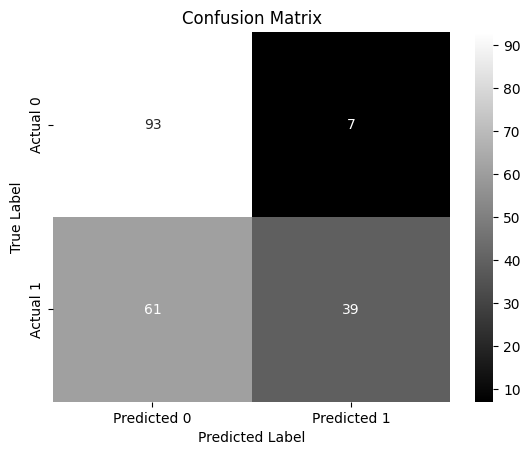

In [96]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# 오차 행렬 계산
cm = confusion_matrix(y_test, y_pred)

# 오차 행렬을 데이터프레임으로 변환
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# seaborn을 사용하여 히트맵으로 표현
sns.heatmap(cm_df, annot=True, fmt='d', cmap='gray')

# 플롯 설정
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [65]:
# model.save('model_0.weight')
history.history

{'loss': [0.400165319442749,
  0.3154993951320648,
  0.2838250994682312,
  0.2672531306743622,
  0.2531585395336151,
  0.2352389544248581,
  0.22186918556690216,
  0.2108205258846283,
  0.20536980032920837,
  0.19482332468032837,
  0.16987383365631104,
  0.15290522575378418,
  0.13702550530433655,
  0.12272747606039047,
  0.11832483112812042,
  0.11733919382095337,
  0.09145599603652954,
  0.08272285759449005,
  0.09002678096294403,
  0.05563298985362053,
  0.059388406574726105,
  0.04931303858757019,
  0.04851027578115463,
  0.04092143848538399,
  0.04547274112701416,
  0.04467623308300972,
  0.0205785371363163,
  0.036929067224264145,
  0.026707688346505165,
  0.025127962231636047,
  0.031634192913770676,
  0.027675151824951172,
  0.018795613199472427,
  0.02003125473856926,
  0.015157368965446949,
  0.028012335300445557,
  0.020502734929323196,
  0.020398210734128952,
  0.015351774170994759,
  0.010350801050662994,
  0.026837196201086044,
  0.008140813559293747,
  0.0034239187370985

In [97]:
precision = (36/39) * 100
recall = 36
f1 = (precision * 2 * recall) / (precision + recall)
print(f1)

51.79856115107913


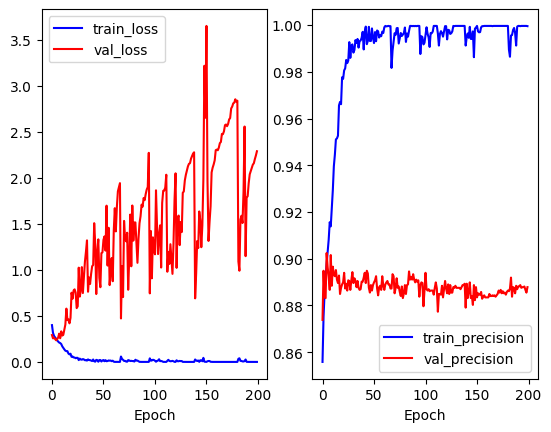

In [66]:
import matplotlib.pyplot as plt
# 위의 수행 결과를 그래프로 보자!!!!!
plt.subplot(1,2,1) # loss
plt.plot(history.history["loss"], "b-", label="train_loss")
plt.plot(history.history["val_loss"], "r-", label="val_loss")
plt.xlabel("Epoch")
plt.legend()

plt.subplot(1,2,2) # metrics : accuracy
plt.plot(history.history["precision_1"], "black", label="train_precision")
plt.plot(history.history["val_precision_1"], "r-", label="val_precision")
plt.xlabel("Epoch")
plt.legend()

In [ ]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 10.2 MB/s eta 0:00:00


In [ ]:
!zip -r /content/image_classification_model.zip /content/image_classification_model

updating: content/image_classification_model/ (stored 0%)
  adding: content/image_classification_model/my_model.weights.index (deflated 63%)
  adding: content/image_classification_model/checkpoint (deflated 42%)
  adding: content/image_classification_model/my_model.weights.data-00000-of-00001 (deflated 30%)


In [ ]:
import optuna
import time
import PIL
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
# Layer수 기반으로 Tunning
def create_model(dnn_dropout_rates, dnn_num_nodes, num_dl_layers):
    model = tf.keras.Sequential()
    model.add(Dense(input_shape=(1536,), units=512, activation="relu"))

    for i in range(num_dl_layers):
        model.add(Dense(units=dnn_num_nodes[i], activation="relu"))
        model.add(Dropout(rate=dnn_dropout_rates[i]))

    model.add(Dense(units=32, activation="relu"))
    model.add(Dropout(rate=dnn_dropout_rates[-1]))
    model.add(Dense(units=2, activation="softmax"))
    return model

def object_res(trial):
    tf.keras.backend.clear_session()

    num_dl_layers = trial.suggest_int("num_dl_layers", 2, 5)
    optimizers = trial.suggest_float("optimizers", 0.001, 0.1)

    dnn_num_nodes = []
    dnn_dropout_rates = []

    for i in range(num_dl_layers):
        dnn_num_node = trial.suggest_int(f"dnn{i+1}_num_node", 2**(8-i), 2**(9-i))
        dnn_dropout_rate = trial.suggest_float(f"dnn{i+1}_dropout_rate", 0.1, 0.5)
        dnn_num_nodes.append(dnn_num_node)
        dnn_dropout_rates.append(dnn_dropout_rate)

    model = create_model(dnn_dropout_rates, dnn_num_nodes, num_dl_layers)
    model.compile(optimizer=tf.keras.optimizers.Adam(optimizers), loss="categorical_crossentropy", metrics=tf.keras.metrics.Precision())

    history = model.fit(train_features, train_y, validation_data=(valid_features, valid_y), epochs=20, batch_size=128)

    score = history.history["val_precision"][-1]

    return score


study = optuna.create_study(direction="maximize")
study.optimize(object_res, n_trials=100)

NameError: ignored

In [ ]:
# Layer 수 고정한 뒤 Node, Dropout Rate 조절
def create_model(dnn_dropout_rate1, dnn_num_node1,dnn_dropout_rate2, dnn_num_node2,dnn_dropout_rate3, dnn_num_node3,dnn_dropout_rate4, dnn_num_node4,optimizers):
    model = tf.keras.Sequential()
    model.add(Dense(input_shape=(1536,), units=512, activation="relu"))

    model.add(Dense(units=dnn_num_node1, activation="relu"))
    model.add(Dropout(rate=dnn_dropout_rate1))
    model.add(Dense(units=dnn_num_node2, activation="relu"))
    model.add(Dropout(rate=dnn_dropout_rate2))
    model.add(Dense(units=dnn_num_node3, activation="relu"))
    model.add(Dropout(rate=dnn_dropout_rate3))
    model.add(Dense(units=dnn_num_node4, activation="relu"))
    model.add(Dropout(rate=dnn_dropout_rate4))
    model.add(Dense(units=16, activation="relu"))
    model.add(Dense(units=2, activation="softmax"))
    return model

def object_res(trial):
    tf.keras.backend.clear_session()

    dnn_dropout_rate1 = trial.suggest_float("dnn_dropout_rate1", 0.1, 0.3)
    dnn_num_node1 = trial.suggest_int("dnn_num_node1", 200,300)
    dnn_dropout_rate2 = trial.suggest_float("dnn_dropout_rate2", 0.1, 0.3)
    dnn_num_node2 = trial.suggest_int("dnn_num_node2", 100,150)
    dnn_dropout_rate3 = trial.suggest_float("dnn_dropout_rate3", 0.1, 0.3)
    dnn_num_node3 = trial.suggest_int("dnn_num_node3", 50,80)
    dnn_dropout_rate4 = trial.suggest_float("dnn_dropout_rate4", 0.1, 0.3)
    dnn_num_node4 = trial.suggest_int("dnn_num_node4", 20,40)
    optimizers = trial.suggest_float("optimizer",0.0001,0.1)

    model = create_model(dnn_dropout_rate1, dnn_num_node1,dnn_dropout_rate2, dnn_num_node2,dnn_dropout_rate3, dnn_num_node3,dnn_dropout_rate4, dnn_num_node4, optimizers)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = optimizers),
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])

    history = model.fit(train_features, train_y,
                        validation_data=(valid_features, valid_y),
                        epochs=20, batch_size=64)

    score = history.history["val_loss"][-1]
    return score

In [ ]:
study_my_res = optuna.create_study(direction = "maximize")
study_my_res.optimize(object_res,n_trials= 100)

[I 2023-06-21 04:40:43,487] A new study created in memory with name: no-name-f70ba09a-0d50-410b-9649-b72264eb72cc


Epoch 1/20
170/170 [==============================] - 5s 7ms/step - loss: 13.0665 - accuracy: 0.8661 - val_loss: 0.3813 - val_accuracy: 0.8728
Epoch 2/20
170/170 [==============================] - 1s 5ms/step - loss: 0.3814 - accuracy: 0.8734 - val_loss: 0.3813 - val_accuracy: 0.8728
Epoch 3/20
170/170 [==============================] - 1s 6ms/step - loss: 0.3807 - accuracy: 0.8734 - val_loss: 0.3822 - val_accuracy: 0.8728
Epoch 4/20
170/170 [==============================] - 1s 5ms/step - loss: 0.3805 - accuracy: 0.8734 - val_loss: 0.3812 - val_accuracy: 0.8728
Epoch 5/20
170/170 [==============================] - 1s 5ms/step - loss: 0.3811 - accuracy: 0.8734 - val_loss: 0.3816 - val_accuracy: 0.8728
Epoch 6/20
170/170 [==============================] - 1s 5ms/step - loss: 0.3815 - accuracy: 0.8734 - val_loss: 0.3811 - val_accuracy: 0.8728
Epoch 7/20
170/170 [==============================] - 1s 5ms/step - loss: 0.3824 - accuracy: 0.8734 - val_loss: 0.3823 - val_accuracy: 0.8728
Epoch

[I 2023-06-21 04:41:08,145] Trial 0 finished with value: 0.3822820782661438 and parameters: {'dnn_dropout_rate1': 0.12743637811853775, 'dnn_num_node1': 236, 'dnn_dropout_rate2': 0.21144270871402432, 'dnn_num_node2': 144, 'dnn_dropout_rate3': 0.23283205061373727, 'dnn_num_node3': 63, 'dnn_dropout_rate4': 0.14670434144279584, 'dnn_num_node4': 27, 'optimizer': 0.04853571729089449}. Best is trial 0 with value: 0.3822820782661438.


Epoch 1/20
170/170 [==============================] - 5s 10ms/step - loss: 3.1300 - accuracy: 0.8635 - val_loss: 0.3812 - val_accuracy: 0.8728
Epoch 2/20
170/170 [==============================] - 1s 7ms/step - loss: 0.3813 - accuracy: 0.8729 - val_loss: 0.3850 - val_accuracy: 0.8728
Epoch 3/20
170/170 [==============================] - 1s 5ms/step - loss: 0.3803 - accuracy: 0.8734 - val_loss: 0.3811 - val_accuracy: 0.8728
Epoch 4/20
170/170 [==============================] - 1s 6ms/step - loss: 0.3802 - accuracy: 0.8734 - val_loss: 0.3815 - val_accuracy: 0.8728
Epoch 5/20
170/170 [==============================] - 1s 6ms/step - loss: 0.3812 - accuracy: 0.8734 - val_loss: 0.3811 - val_accuracy: 0.8728
Epoch 6/20
170/170 [==============================] - 1s 5ms/step - loss: 0.3809 - accuracy: 0.8734 - val_loss: 0.3814 - val_accuracy: 0.8728
Epoch 7/20
170/170 [==============================] - 1s 5ms/step - loss: 0.3810 - accuracy: 0.8734 - val_loss: 0.3812 - val_accuracy: 0.8728
Epoch

[W 2023-06-21 04:41:30,970] Trial 1 failed with parameters: {'dnn_dropout_rate1': 0.15599997757472375, 'dnn_num_node1': 213, 'dnn_dropout_rate2': 0.22255295443380793, 'dnn_num_node2': 123, 'dnn_dropout_rate3': 0.23890458151008212, 'dnn_num_node3': 78, 'dnn_dropout_rate4': 0.1814753571079606, 'dnn_num_node4': 20, 'optimizer': 0.03301271479979488} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-44-710438812588>", line 36, in object_res
    history = model.fit(train_features, train_y,
  File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 65, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1685, in fit
    tmp_logs = self.train_function(iterator)
  File "/usr/local/lib/python3.10/dist-p

KeyboardInterrupt: ignored

In [ ]:
def create_model(dnn_dropout_rates, dnn_num_nodes, num_dl_layers):
    model = tf.keras.Sequential()
    model.add(Dense(input_shape=(1536,), units=512, activation="relu"))

    for i in range(num_dl_layers):
        model.add(Dense(units=dnn_num_nodes[i], activation="relu"))
        model.add(Dropout(rate=dnn_dropout_rates[i]))

    model.add(Dense(units=32, activation="relu"))
    model.add(Dropout(rate=dnn_dropout_rates[-1]))
    model.add(Dense(units=2, activation="softmax"))
    return model

def object_res(trial):
    tf.keras.backend.clear_session()

    num_dl_layers = trial.suggest_int("num_dl_layers", 3, 5)
    optimizers = trial.suggest_float("optimizers", 0.001, 0.1)

    dnn_num_nodes = []
    dnn_dropout_rates = []

    for i in range(num_dl_layers):
        dnn_num_node = trial.suggest_int(f"dnn{i+1}_num_node", 2**(8-i), 2**(9-i))
        dnn_dropout_rate = trial.suggest_float(f"dnn{i+1}_dropout_rate", 0.1, 0.5)
        dnn_num_nodes.append(dnn_num_node)
        dnn_dropout_rates.append(dnn_dropout_rate)

    model = create_model(dnn_dropout_rates, dnn_num_nodes, num_dl_layers)
    model.compile(optimizer=tf.keras.optimizers.Adam(optimizers), loss="categorical_crossentropy", metrics=[tf.keras.metrics.Precision()])

    history = model.fit(train_features, train_y, validation_data=(valid_features, valid_y), epochs=20, batch_size=128)

    score = history.history["val_precision"][-1]

    return score


study = optuna.create_study(direction="maximize")
study.optimize(object_res, n_trials=100)

[I 2023-06-15 08:04:06,601] A new study created in memory with name: no-name-afed5bf9-7d85-420e-8273-d8ccea7da6d8


Epoch 1/20
73/73 [==============================] - 4s 11ms/step - loss: 81.0731 - precision: 0.8990 - val_loss: 0.2381 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 0s 6ms/step - loss: 0.6268 - precision: 0.9351 - val_loss: 0.2381 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2397 - precision: 0.9356 - val_loss: 0.2381 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2459 - precision: 0.9355 - val_loss: 0.2381 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2393 - precision: 0.9356 - val_loss: 0.2382 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2391 - precision: 0.9356 - val_loss: 0.2381 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2395 - precision: 0.9356 - val_loss: 0.2381 - val_precision: 0.9359
Epoc

[I 2023-06-15 08:04:21,943] Trial 0 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 4, 'optimizers': 0.04366863155602795, 'dnn1_num_node': 437, 'dnn1_dropout_rate': 0.15212114184622832, 'dnn2_num_node': 193, 'dnn2_dropout_rate': 0.1487187985270384, 'dnn3_num_node': 124, 'dnn3_dropout_rate': 0.29579126490143115, 'dnn4_num_node': 37, 'dnn4_dropout_rate': 0.2426624280086457}. Best is trial 0 with value: 0.9359056353569031.


Epoch 1/20
73/73 [==============================] - 4s 11ms/step - loss: 288.6065 - precision: 0.9282 - val_loss: 0.2412 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2401 - precision: 0.9356 - val_loss: 0.2387 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 0s 6ms/step - loss: 2.3756 - precision: 0.9353 - val_loss: 0.2465 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2740 - precision: 0.9353 - val_loss: 0.2381 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2394 - precision: 0.9356 - val_loss: 0.2381 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 0s 7ms/step - loss: 0.5069 - precision: 0.9356 - val_loss: 0.2382 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2394 - precision: 0.9356 - val_loss: 0.2381 - val_precision: 0.9359
Epo

[I 2023-06-15 08:04:36,859] Trial 1 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 4, 'optimizers': 0.05656724387966191, 'dnn1_num_node': 419, 'dnn1_dropout_rate': 0.29999365358588853, 'dnn2_num_node': 243, 'dnn2_dropout_rate': 0.4544720939537966, 'dnn3_num_node': 126, 'dnn3_dropout_rate': 0.36225648453401615, 'dnn4_num_node': 32, 'dnn4_dropout_rate': 0.13158619395326068}. Best is trial 0 with value: 0.9359056353569031.


Epoch 1/20
73/73 [==============================] - 3s 10ms/step - loss: 7325.9854 - precision: 0.9324 - val_loss: 0.2381 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2395 - precision: 0.9356 - val_loss: 0.2382 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2393 - precision: 0.9356 - val_loss: 0.2381 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2394 - precision: 0.9356 - val_loss: 0.2382 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2393 - precision: 0.9356 - val_loss: 0.2382 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2403 - precision: 0.9356 - val_loss: 0.2382 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2395 - precision: 0.9356 - val_loss: 0.2381 - val_precision: 0.9359
Ep

[I 2023-06-15 08:04:58,941] Trial 2 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 3, 'optimizers': 0.09586748936725066, 'dnn1_num_node': 511, 'dnn1_dropout_rate': 0.25824808330300497, 'dnn2_num_node': 160, 'dnn2_dropout_rate': 0.20029815920322194, 'dnn3_num_node': 69, 'dnn3_dropout_rate': 0.12813329095198248}. Best is trial 0 with value: 0.9359056353569031.


Epoch 1/20
73/73 [==============================] - 4s 13ms/step - loss: 16.1066 - precision: 0.9133 - val_loss: 0.2395 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 9ms/step - loss: 0.2490 - precision: 0.9355 - val_loss: 0.2381 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 9ms/step - loss: 0.2395 - precision: 0.9355 - val_loss: 0.2381 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 1s 10ms/step - loss: 0.2403 - precision: 0.9355 - val_loss: 0.2381 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 1s 9ms/step - loss: 0.2398 - precision: 0.9355 - val_loss: 0.2382 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2391 - precision: 0.9356 - val_loss: 0.2381 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2391 - precision: 0.9356 - val_loss: 0.2381 - val_precision: 0.9359
Epo

[I 2023-06-15 08:05:12,900] Trial 3 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 3, 'optimizers': 0.031465293252051024, 'dnn1_num_node': 372, 'dnn1_dropout_rate': 0.13265840253765404, 'dnn2_num_node': 240, 'dnn2_dropout_rate': 0.3823599921220625, 'dnn3_num_node': 115, 'dnn3_dropout_rate': 0.21839895891295222}. Best is trial 0 with value: 0.9359056353569031.


Epoch 1/20
73/73 [==============================] - 5s 14ms/step - loss: 20.2744 - precision: 0.9238 - val_loss: 0.2398 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 11ms/step - loss: 0.2432 - precision: 0.9355 - val_loss: 0.2385 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 10ms/step - loss: 0.2403 - precision: 0.9355 - val_loss: 0.2384 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 1s 11ms/step - loss: 0.2402 - precision: 0.9356 - val_loss: 0.2385 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2402 - precision: 0.9356 - val_loss: 0.2382 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2398 - precision: 0.9356 - val_loss: 0.2391 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2395 - precision: 0.9356 - val_loss: 0.2381 - val_precision: 0.9359
E

[I 2023-06-15 08:05:34,982] Trial 4 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 5, 'optimizers': 0.03377180356915465, 'dnn1_num_node': 489, 'dnn1_dropout_rate': 0.33989366336075466, 'dnn2_num_node': 255, 'dnn2_dropout_rate': 0.21540515345233852, 'dnn3_num_node': 74, 'dnn3_dropout_rate': 0.26243352280386123, 'dnn4_num_node': 48, 'dnn4_dropout_rate': 0.2470139633933644, 'dnn5_num_node': 18, 'dnn5_dropout_rate': 0.14069175062688874}. Best is trial 0 with value: 0.9359056353569031.


Epoch 1/20
73/73 [==============================] - 3s 10ms/step - loss: 24.8907 - precision: 0.9234 - val_loss: 0.2381 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2413 - precision: 0.9355 - val_loss: 0.2381 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2392 - precision: 0.9356 - val_loss: 0.2381 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2391 - precision: 0.9356 - val_loss: 0.2381 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2394 - precision: 0.9356 - val_loss: 0.2381 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2393 - precision: 0.9356 - val_loss: 0.2382 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2391 - precision: 0.9356 - val_loss: 0.2382 - val_precision: 0.9359
Epoc

[I 2023-06-15 08:05:48,756] Trial 5 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 3, 'optimizers': 0.040656532046325564, 'dnn1_num_node': 418, 'dnn1_dropout_rate': 0.402734358007489, 'dnn2_num_node': 187, 'dnn2_dropout_rate': 0.40319079260656443, 'dnn3_num_node': 120, 'dnn3_dropout_rate': 0.3522397541905413}. Best is trial 0 with value: 0.9359056353569031.


Epoch 1/20
73/73 [==============================] - 3s 9ms/step - loss: 0.6874 - precision: 0.9094 - val_loss: 0.2138 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2502 - precision: 0.9355 - val_loss: 0.2020 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2357 - precision: 0.9353 - val_loss: 0.1830 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2254 - precision: 0.9355 - val_loss: 0.1863 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2277 - precision: 0.9356 - val_loss: 0.2155 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2168 - precision: 0.9356 - val_loss: 0.1938 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2098 - precision: 0.9355 - val_loss: 0.1946 - val_precision: 0.9359
Epoch 

[I 2023-06-15 08:06:10,533] Trial 6 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 3, 'optimizers': 0.007474264205335085, 'dnn1_num_node': 472, 'dnn1_dropout_rate': 0.43205910646168777, 'dnn2_num_node': 224, 'dnn2_dropout_rate': 0.24761751119513448, 'dnn3_num_node': 79, 'dnn3_dropout_rate': 0.4644801689376541}. Best is trial 0 with value: 0.9359056353569031.


Epoch 1/20
73/73 [==============================] - 5s 12ms/step - loss: 136.8644 - precision: 0.9178 - val_loss: 0.2383 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 7ms/step - loss: 0.3144 - precision: 0.9340 - val_loss: 0.2381 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2391 - precision: 0.9356 - val_loss: 0.2386 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2391 - precision: 0.9356 - val_loss: 0.2382 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2393 - precision: 0.9356 - val_loss: 0.2381 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 1s 9ms/step - loss: 0.2723 - precision: 0.9356 - val_loss: 0.2381 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 10ms/step - loss: 0.7735 - precision: 0.9343 - val_loss: 0.2382 - val_precision: 0.9359
Ep

[I 2023-06-15 08:06:32,750] Trial 7 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 4, 'optimizers': 0.054633865802195515, 'dnn1_num_node': 313, 'dnn1_dropout_rate': 0.18460422089884343, 'dnn2_num_node': 148, 'dnn2_dropout_rate': 0.16798126368486915, 'dnn3_num_node': 88, 'dnn3_dropout_rate': 0.19584485307136262, 'dnn4_num_node': 63, 'dnn4_dropout_rate': 0.3717513755182813}. Best is trial 0 with value: 0.9359056353569031.


Epoch 1/20
73/73 [==============================] - 4s 10ms/step - loss: 11.1979 - precision: 0.9028 - val_loss: 0.2415 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 7ms/step - loss: 1.8014 - precision: 0.9355 - val_loss: 0.2387 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2395 - precision: 0.9356 - val_loss: 0.2382 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2390 - precision: 0.9356 - val_loss: 0.2389 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 1s 10ms/step - loss: 0.2673 - precision: 0.9355 - val_loss: 0.2381 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 1s 10ms/step - loss: 0.2396 - precision: 0.9355 - val_loss: 0.2381 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 11ms/step - loss: 0.3397 - precision: 0.9354 - val_loss: 0.2387 - val_precision: 0.9359
E

[I 2023-06-15 08:06:54,805] Trial 8 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 5, 'optimizers': 0.0609342030709081, 'dnn1_num_node': 341, 'dnn1_dropout_rate': 0.3959254976463461, 'dnn2_num_node': 222, 'dnn2_dropout_rate': 0.19179639710591873, 'dnn3_num_node': 124, 'dnn3_dropout_rate': 0.26352281077368583, 'dnn4_num_node': 37, 'dnn4_dropout_rate': 0.46539343845334724, 'dnn5_num_node': 20, 'dnn5_dropout_rate': 0.4725430208814235}. Best is trial 0 with value: 0.9359056353569031.


Epoch 1/20
73/73 [==============================] - 3s 9ms/step - loss: 2.8456 - precision: 0.9172 - val_loss: 0.2381 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2440 - precision: 0.9353 - val_loss: 0.2381 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2419 - precision: 0.9356 - val_loss: 0.2386 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2409 - precision: 0.9356 - val_loss: 0.2382 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2405 - precision: 0.9356 - val_loss: 0.2388 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2407 - precision: 0.9356 - val_loss: 0.2382 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2397 - precision: 0.9356 - val_loss: 0.2381 - val_precision: 0.9359
Epoch 

[I 2023-06-15 08:07:16,808] Trial 9 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 3, 'optimizers': 0.0205262612594116, 'dnn1_num_node': 401, 'dnn1_dropout_rate': 0.49630199014673126, 'dnn2_num_node': 199, 'dnn2_dropout_rate': 0.13727176766279967, 'dnn3_num_node': 64, 'dnn3_dropout_rate': 0.3982046259504438}. Best is trial 0 with value: 0.9359056353569031.


Epoch 1/20
73/73 [==============================] - 6s 15ms/step - loss: 0.3248 - precision: 0.9240 - val_loss: 0.1871 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2260 - precision: 0.9356 - val_loss: 0.2054 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2097 - precision: 0.9356 - val_loss: 0.1773 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2048 - precision: 0.9356 - val_loss: 0.1781 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2035 - precision: 0.9356 - val_loss: 0.1816 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 1s 8ms/step - loss: 0.1926 - precision: 0.9362 - val_loss: 0.1769 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 0s 7ms/step - loss: 0.1905 - precision: 0.9361 - val_loss: 0.1819 - val_precision: 0.9359
Epoch

[I 2023-06-15 08:07:40,295] Trial 10 finished with value: 0.9390943646430969 and parameters: {'num_dl_layers': 4, 'optimizers': 0.004844516644572167, 'dnn1_num_node': 455, 'dnn1_dropout_rate': 0.1298903113641977, 'dnn2_num_node': 128, 'dnn2_dropout_rate': 0.1029886954611644, 'dnn3_num_node': 105, 'dnn3_dropout_rate': 0.4979654700440606, 'dnn4_num_node': 44, 'dnn4_dropout_rate': 0.2386840627982252}. Best is trial 10 with value: 0.9390943646430969.


Epoch 1/20
73/73 [==============================] - 4s 11ms/step - loss: 0.2922 - precision: 0.9257 - val_loss: 0.1906 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2324 - precision: 0.9355 - val_loss: 0.1932 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2070 - precision: 0.9356 - val_loss: 0.1736 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 1s 8ms/step - loss: 0.1970 - precision: 0.9356 - val_loss: 0.1711 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 1s 10ms/step - loss: 0.1940 - precision: 0.9356 - val_loss: 0.1704 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 1s 9ms/step - loss: 0.1825 - precision: 0.9356 - val_loss: 0.1731 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 9ms/step - loss: 0.1866 - precision: 0.9357 - val_loss: 0.1791 - val_precision: 0.9359
Epoc

[I 2023-06-15 08:08:02,476] Trial 11 finished with value: 0.9362244606018066 and parameters: {'num_dl_layers': 4, 'optimizers': 0.0013013717734806792, 'dnn1_num_node': 449, 'dnn1_dropout_rate': 0.11421610624304891, 'dnn2_num_node': 176, 'dnn2_dropout_rate': 0.1114004464742394, 'dnn3_num_node': 106, 'dnn3_dropout_rate': 0.4765872859209814, 'dnn4_num_node': 45, 'dnn4_dropout_rate': 0.23915649944878453}. Best is trial 10 with value: 0.9390943646430969.


Epoch 1/20
73/73 [==============================] - 4s 10ms/step - loss: 0.2828 - precision: 0.9326 - val_loss: 0.1995 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2222 - precision: 0.9356 - val_loss: 0.1952 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2141 - precision: 0.9356 - val_loss: 0.1945 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 1s 8ms/step - loss: 0.1972 - precision: 0.9356 - val_loss: 0.1720 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 0s 7ms/step - loss: 0.1967 - precision: 0.9356 - val_loss: 0.1838 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 1s 7ms/step - loss: 0.1994 - precision: 0.9356 - val_loss: 0.1818 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 7ms/step - loss: 0.1855 - precision: 0.9356 - val_loss: 0.1822 - val_precision: 0.9359
Epoch

[I 2023-06-15 08:08:17,851] Trial 12 finished with value: 0.9406887888908386 and parameters: {'num_dl_layers': 4, 'optimizers': 0.002211985133670079, 'dnn1_num_node': 455, 'dnn1_dropout_rate': 0.11183475484680955, 'dnn2_num_node': 133, 'dnn2_dropout_rate': 0.10463494853494376, 'dnn3_num_node': 101, 'dnn3_dropout_rate': 0.4822007674096347, 'dnn4_num_node': 48, 'dnn4_dropout_rate': 0.19588523566733698}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 4s 10ms/step - loss: 0.8993 - precision: 0.9319 - val_loss: 0.1971 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2261 - precision: 0.9355 - val_loss: 0.2157 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2221 - precision: 0.9356 - val_loss: 0.1971 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2084 - precision: 0.9356 - val_loss: 0.1950 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2344 - precision: 0.9355 - val_loss: 0.1969 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2060 - precision: 0.9355 - val_loss: 0.1867 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2047 - precision: 0.9356 - val_loss: 0.1863 - val_precision: 0.9359
Epoch

[I 2023-06-15 08:08:40,090] Trial 13 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 5, 'optimizers': 0.015234012226784659, 'dnn1_num_node': 465, 'dnn1_dropout_rate': 0.10067912744421291, 'dnn2_num_node': 128, 'dnn2_dropout_rate': 0.27831057191417374, 'dnn3_num_node': 100, 'dnn3_dropout_rate': 0.49828818830348176, 'dnn4_num_node': 57, 'dnn4_dropout_rate': 0.1406927595547735, 'dnn5_num_node': 32, 'dnn5_dropout_rate': 0.13114495834855447}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 5s 15ms/step - loss: 0.3088 - precision: 0.9174 - val_loss: 0.2243 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 9ms/step - loss: 0.2324 - precision: 0.9356 - val_loss: 0.2018 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 11ms/step - loss: 0.2174 - precision: 0.9356 - val_loss: 0.1966 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2095 - precision: 0.9356 - val_loss: 0.1747 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 0s 7ms/step - loss: 0.1992 - precision: 0.9356 - val_loss: 0.1754 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 1s 7ms/step - loss: 0.1923 - precision: 0.9356 - val_loss: 0.1855 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 0s 7ms/step - loss: 0.1872 - precision: 0.9356 - val_loss: 0.1655 - val_precision: 0.9359
Epoc

[I 2023-06-15 08:09:02,114] Trial 14 finished with value: 0.9371811151504517 and parameters: {'num_dl_layers': 4, 'optimizers': 0.0023303369365580903, 'dnn1_num_node': 383, 'dnn1_dropout_rate': 0.20072566420899896, 'dnn2_num_node': 129, 'dnn2_dropout_rate': 0.1064663516580648, 'dnn3_num_node': 91, 'dnn3_dropout_rate': 0.43401427507234813, 'dnn4_num_node': 52, 'dnn4_dropout_rate': 0.18336051155751038}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 4s 11ms/step - loss: 2.7037 - precision: 0.9236 - val_loss: 0.2146 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2422 - precision: 0.9356 - val_loss: 0.2258 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2445 - precision: 0.9351 - val_loss: 0.2380 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2402 - precision: 0.9356 - val_loss: 0.2375 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2403 - precision: 0.9356 - val_loss: 0.2380 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2394 - precision: 0.9356 - val_loss: 0.2386 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2393 - precision: 0.9356 - val_loss: 0.2381 - val_precision: 0.9359
Epoch

[I 2023-06-15 08:09:24,156] Trial 15 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 4, 'optimizers': 0.019147198523741825, 'dnn1_num_node': 509, 'dnn1_dropout_rate': 0.214985940474889, 'dnn2_num_node': 152, 'dnn2_dropout_rate': 0.10139874944413602, 'dnn3_num_node': 108, 'dnn3_dropout_rate': 0.4410767979704042, 'dnn4_num_node': 43, 'dnn4_dropout_rate': 0.322309315167273}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 4s 10ms/step - loss: 0.7839 - precision: 0.9253 - val_loss: 0.2392 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2394 - precision: 0.9356 - val_loss: 0.2241 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2479 - precision: 0.9350 - val_loss: 0.2393 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2380 - precision: 0.9353 - val_loss: 0.2437 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2421 - precision: 0.9355 - val_loss: 0.2185 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2386 - precision: 0.9355 - val_loss: 0.2382 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2398 - precision: 0.9356 - val_loss: 0.2379 - val_precision: 0.9359
Epoch

[I 2023-06-15 08:09:40,035] Trial 16 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 5, 'optimizers': 0.014556557630167222, 'dnn1_num_node': 264, 'dnn1_dropout_rate': 0.17512973713169566, 'dnn2_num_node': 141, 'dnn2_dropout_rate': 0.31042658181718413, 'dnn3_num_node': 98, 'dnn3_dropout_rate': 0.49559708290963206, 'dnn4_num_node': 54, 'dnn4_dropout_rate': 0.11348264758346077, 'dnn5_num_node': 29, 'dnn5_dropout_rate': 0.3656362337918608}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 3s 10ms/step - loss: 0.2983 - precision: 0.9224 - val_loss: 0.2022 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2363 - precision: 0.9356 - val_loss: 0.1881 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2084 - precision: 0.9355 - val_loss: 0.2213 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2046 - precision: 0.9356 - val_loss: 0.2059 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2064 - precision: 0.9356 - val_loss: 0.1851 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 0s 6ms/step - loss: 0.1915 - precision: 0.9356 - val_loss: 0.1759 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 0s 6ms/step - loss: 0.1921 - precision: 0.9356 - val_loss: 0.1715 - val_precision: 0.9359
Epoch

[I 2023-06-15 08:09:54,555] Trial 17 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 4, 'optimizers': 0.0017926776670176762, 'dnn1_num_node': 446, 'dnn1_dropout_rate': 0.10454389935626468, 'dnn2_num_node': 173, 'dnn2_dropout_rate': 0.1573845228759791, 'dnn3_num_node': 109, 'dnn3_dropout_rate': 0.4035928839288448, 'dnn4_num_node': 42, 'dnn4_dropout_rate': 0.1908502003781197}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 3s 9ms/step - loss: 6.3644 - precision: 0.9209 - val_loss: 0.2181 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2431 - precision: 0.9354 - val_loss: 0.2262 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2431 - precision: 0.9357 - val_loss: 0.2421 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2405 - precision: 0.9355 - val_loss: 0.2396 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2398 - precision: 0.9356 - val_loss: 0.2382 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2390 - precision: 0.9356 - val_loss: 0.2386 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2394 - precision: 0.9356 - val_loss: 0.2381 - val_precision: 0.9359
Epoch 

[I 2023-06-15 08:10:08,919] Trial 18 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 4, 'optimizers': 0.02290288440224765, 'dnn1_num_node': 358, 'dnn1_dropout_rate': 0.15348878458621987, 'dnn2_num_node': 164, 'dnn2_dropout_rate': 0.22898639960299852, 'dnn3_num_node': 89, 'dnn3_dropout_rate': 0.4402698421022235, 'dnn4_num_node': 49, 'dnn4_dropout_rate': 0.301821862564164}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 4s 11ms/step - loss: 0.4050 - precision: 0.9207 - val_loss: 0.2217 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2297 - precision: 0.9356 - val_loss: 0.1924 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2332 - precision: 0.9356 - val_loss: 0.2257 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2209 - precision: 0.9356 - val_loss: 0.1981 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2205 - precision: 0.9356 - val_loss: 0.2211 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2140 - precision: 0.9356 - val_loss: 0.2216 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2166 - precision: 0.9355 - val_loss: 0.1964 - val_precision: 0.9359
Epoch

[I 2023-06-15 08:10:24,449] Trial 19 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 5, 'optimizers': 0.011106980767377428, 'dnn1_num_node': 479, 'dnn1_dropout_rate': 0.22899367213767524, 'dnn2_num_node': 140, 'dnn2_dropout_rate': 0.17273200294642893, 'dnn3_num_node': 83, 'dnn3_dropout_rate': 0.4992489509013841, 'dnn4_num_node': 39, 'dnn4_dropout_rate': 0.1908506777999196, 'dnn5_num_node': 25, 'dnn5_dropout_rate': 0.2690789528270433}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 3s 10ms/step - loss: 7.5554 - precision: 0.9132 - val_loss: 0.2392 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2410 - precision: 0.9356 - val_loss: 0.2382 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2516 - precision: 0.9354 - val_loss: 0.2382 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2396 - precision: 0.9356 - val_loss: 0.2382 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2391 - precision: 0.9356 - val_loss: 0.2382 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2392 - precision: 0.9356 - val_loss: 0.2381 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2394 - precision: 0.9356 - val_loss: 0.2381 - val_precision: 0.9359
Epoch

[I 2023-06-15 08:10:38,985] Trial 20 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 4, 'optimizers': 0.02807032029026426, 'dnn1_num_node': 410, 'dnn1_dropout_rate': 0.1507325936018583, 'dnn2_num_node': 210, 'dnn2_dropout_rate': 0.13148554779201682, 'dnn3_num_node': 102, 'dnn3_dropout_rate': 0.3685032525866313, 'dnn4_num_node': 59, 'dnn4_dropout_rate': 0.27036489261297275}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 5s 11ms/step - loss: 0.3371 - precision: 0.9130 - val_loss: 0.2187 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2314 - precision: 0.9355 - val_loss: 0.2116 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2151 - precision: 0.9356 - val_loss: 0.1760 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2025 - precision: 0.9356 - val_loss: 0.1751 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 0s 7ms/step - loss: 0.1990 - precision: 0.9356 - val_loss: 0.1690 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 1s 8ms/step - loss: 0.1991 - precision: 0.9356 - val_loss: 0.1787 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 0s 7ms/step - loss: 0.1918 - precision: 0.9356 - val_loss: 0.1693 - val_precision: 0.9359
Epoch

[I 2023-06-15 08:10:55,396] Trial 21 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 4, 'optimizers': 0.002534592396035767, 'dnn1_num_node': 387, 'dnn1_dropout_rate': 0.19660332378260242, 'dnn2_num_node': 130, 'dnn2_dropout_rate': 0.10005361176732759, 'dnn3_num_node': 92, 'dnn3_dropout_rate': 0.43992518068435466, 'dnn4_num_node': 49, 'dnn4_dropout_rate': 0.19707063956694473}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 4s 10ms/step - loss: 0.4057 - precision: 0.9208 - val_loss: 0.2278 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 9ms/step - loss: 0.2205 - precision: 0.9356 - val_loss: 0.1849 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 10ms/step - loss: 0.2163 - precision: 0.9356 - val_loss: 0.1915 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 1s 9ms/step - loss: 0.2184 - precision: 0.9356 - val_loss: 0.1829 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 1s 9ms/step - loss: 0.2013 - precision: 0.9356 - val_loss: 0.1734 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 1s 9ms/step - loss: 0.2053 - precision: 0.9356 - val_loss: 0.1823 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 12ms/step - loss: 0.1961 - precision: 0.9356 - val_loss: 0.1830 - val_precision: 0.9359
Epo

[I 2023-06-15 08:11:11,802] Trial 22 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 4, 'optimizers': 0.008546284131121636, 'dnn1_num_node': 327, 'dnn1_dropout_rate': 0.16880289695460782, 'dnn2_num_node': 128, 'dnn2_dropout_rate': 0.13249071555108238, 'dnn3_num_node': 93, 'dnn3_dropout_rate': 0.4569570671062674, 'dnn4_num_node': 52, 'dnn4_dropout_rate': 0.1715433085246667}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 4s 11ms/step - loss: 0.7915 - precision: 0.9293 - val_loss: 0.2078 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2219 - precision: 0.9356 - val_loss: 0.2094 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2127 - precision: 0.9356 - val_loss: 0.1827 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2228 - precision: 0.9356 - val_loss: 0.2197 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2291 - precision: 0.9356 - val_loss: 0.1949 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 1s 9ms/step - loss: 0.2056 - precision: 0.9356 - val_loss: 0.2137 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 9ms/step - loss: 0.2083 - precision: 0.9356 - val_loss: 0.1820 - val_precision: 0.9359
Epoch

[I 2023-06-15 08:11:33,987] Trial 23 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 4, 'optimizers': 0.010948058469861938, 'dnn1_num_node': 386, 'dnn1_dropout_rate': 0.13033490506589798, 'dnn2_num_node': 141, 'dnn2_dropout_rate': 0.17743506917910107, 'dnn3_num_node': 114, 'dnn3_dropout_rate': 0.4151251374080913, 'dnn4_num_node': 53, 'dnn4_dropout_rate': 0.20912902373665698}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 4s 11ms/step - loss: 0.3019 - precision: 0.9235 - val_loss: 0.2401 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2303 - precision: 0.9355 - val_loss: 0.2091 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2167 - precision: 0.9355 - val_loss: 0.2267 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2074 - precision: 0.9356 - val_loss: 0.1794 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 1s 7ms/step - loss: 0.1939 - precision: 0.9356 - val_loss: 0.1738 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 1s 8ms/step - loss: 0.1918 - precision: 0.9356 - val_loss: 0.1782 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 0s 6ms/step - loss: 0.1863 - precision: 0.9357 - val_loss: 0.1740 - val_precision: 0.9359
Epoch

[I 2023-06-15 08:11:48,963] Trial 24 finished with value: 0.9371811151504517 and parameters: {'num_dl_layers': 4, 'optimizers': 0.0024943946568222746, 'dnn1_num_node': 296, 'dnn1_dropout_rate': 0.21397677558355968, 'dnn2_num_node': 157, 'dnn2_dropout_rate': 0.10211532150660628, 'dnn3_num_node': 104, 'dnn3_dropout_rate': 0.4648348219095645, 'dnn4_num_node': 45, 'dnn4_dropout_rate': 0.1054387604911757}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 3s 11ms/step - loss: 2.8459 - precision: 0.9167 - val_loss: 0.2506 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2489 - precision: 0.9350 - val_loss: 0.2388 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2435 - precision: 0.9356 - val_loss: 0.2382 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2401 - precision: 0.9356 - val_loss: 0.2381 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2398 - precision: 0.9356 - val_loss: 0.2382 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2395 - precision: 0.9356 - val_loss: 0.2381 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2397 - precision: 0.9356 - val_loss: 0.2381 - val_precision: 0.9359
Epoch

[I 2023-06-15 08:12:11,091] Trial 25 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 4, 'optimizers': 0.02253358343977106, 'dnn1_num_node': 429, 'dnn1_dropout_rate': 0.13603030282211354, 'dnn2_num_node': 140, 'dnn2_dropout_rate': 0.1459975158883218, 'dnn3_num_node': 96, 'dnn3_dropout_rate': 0.41242354644133095, 'dnn4_num_node': 51, 'dnn4_dropout_rate': 0.15796971330218967}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 4s 13ms/step - loss: 1.0196 - precision: 0.9178 - val_loss: 0.2312 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2383 - precision: 0.9356 - val_loss: 0.2491 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2350 - precision: 0.9356 - val_loss: 0.2128 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 1s 9ms/step - loss: 0.2292 - precision: 0.9351 - val_loss: 0.2063 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 1s 9ms/step - loss: 0.2382 - precision: 0.9355 - val_loss: 0.2408 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2400 - precision: 0.9356 - val_loss: 0.2382 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2625 - precision: 0.9351 - val_loss: 0.2394 - val_precision: 0.9359
Epoch

[I 2023-06-15 08:12:24,930] Trial 26 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 3, 'optimizers': 0.014207884917007719, 'dnn1_num_node': 359, 'dnn1_dropout_rate': 0.17941995423045506, 'dnn2_num_node': 169, 'dnn2_dropout_rate': 0.19074232410277478, 'dnn3_num_node': 82, 'dnn3_dropout_rate': 0.4767406655378364}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 4s 13ms/step - loss: 0.4450 - precision: 0.9116 - val_loss: 0.2660 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 9ms/step - loss: 0.2447 - precision: 0.9356 - val_loss: 0.2214 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 10ms/step - loss: 0.2298 - precision: 0.9353 - val_loss: 0.2038 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 1s 9ms/step - loss: 0.2133 - precision: 0.9356 - val_loss: 0.1850 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 1s 10ms/step - loss: 0.2189 - precision: 0.9356 - val_loss: 0.2059 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2211 - precision: 0.9356 - val_loss: 0.1974 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2050 - precision: 0.9356 - val_loss: 0.1823 - val_precision: 0.9359
Epo

[I 2023-06-15 08:12:39,457] Trial 27 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 4, 'optimizers': 0.009442122678114846, 'dnn1_num_node': 454, 'dnn1_dropout_rate': 0.2416805245514641, 'dnn2_num_node': 150, 'dnn2_dropout_rate': 0.1449367980702561, 'dnn3_num_node': 113, 'dnn3_dropout_rate': 0.44560655789703757, 'dnn4_num_node': 57, 'dnn4_dropout_rate': 0.1552903731094475}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 5s 14ms/step - loss: 1.7145 - precision: 0.9130 - val_loss: 0.2414 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 9ms/step - loss: 0.2474 - precision: 0.9355 - val_loss: 0.2385 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 9ms/step - loss: 0.2436 - precision: 0.9358 - val_loss: 0.2381 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2429 - precision: 0.9355 - val_loss: 0.2381 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2402 - precision: 0.9356 - val_loss: 0.2381 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2400 - precision: 0.9356 - val_loss: 0.2383 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2406 - precision: 0.9356 - val_loss: 0.2381 - val_precision: 0.9359
Epoch

[I 2023-06-15 08:13:01,572] Trial 28 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 5, 'optimizers': 0.025408891670259025, 'dnn1_num_node': 491, 'dnn1_dropout_rate': 0.10026021288443693, 'dnn2_num_node': 135, 'dnn2_dropout_rate': 0.23348959628619598, 'dnn3_num_node': 95, 'dnn3_dropout_rate': 0.4239155211940048, 'dnn4_num_node': 46, 'dnn4_dropout_rate': 0.21800840171086167, 'dnn5_num_node': 24, 'dnn5_dropout_rate': 0.4944232943555246}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 3s 10ms/step - loss: 0.5130 - precision: 0.9204 - val_loss: 0.2665 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2408 - precision: 0.9356 - val_loss: 0.2479 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2189 - precision: 0.9356 - val_loss: 0.1937 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2137 - precision: 0.9356 - val_loss: 0.2273 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2160 - precision: 0.9356 - val_loss: 0.1900 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2216 - precision: 0.9355 - val_loss: 0.1984 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2204 - precision: 0.9355 - val_loss: 0.2103 - val_precision: 0.9359
Epoch

[I 2023-06-15 08:13:23,524] Trial 29 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 4, 'optimizers': 0.01624206798756564, 'dnn1_num_node': 404, 'dnn1_dropout_rate': 0.15413786500135385, 'dnn2_num_node': 151, 'dnn2_dropout_rate': 0.12668652973036446, 'dnn3_num_node': 87, 'dnn3_dropout_rate': 0.38183332050912816, 'dnn4_num_node': 41, 'dnn4_dropout_rate': 0.16476095505784666}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 4s 9ms/step - loss: 0.4207 - precision: 0.9216 - val_loss: 0.2001 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2222 - precision: 0.9356 - val_loss: 0.2103 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2209 - precision: 0.9356 - val_loss: 0.1932 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2169 - precision: 0.9356 - val_loss: 0.1942 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2034 - precision: 0.9356 - val_loss: 0.1815 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 0s 6ms/step - loss: 0.1959 - precision: 0.9356 - val_loss: 0.1766 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 8ms/step - loss: 0.1999 - precision: 0.9356 - val_loss: 0.2455 - val_precision: 0.9359
Epoch 

[I 2023-06-15 08:13:38,086] Trial 30 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 4, 'optimizers': 0.006848725913233285, 'dnn1_num_node': 427, 'dnn1_dropout_rate': 0.20472947162302543, 'dnn2_num_node': 183, 'dnn2_dropout_rate': 0.1616901538605104, 'dnn3_num_node': 100, 'dnn3_dropout_rate': 0.33744114553131616, 'dnn4_num_node': 56, 'dnn4_dropout_rate': 0.22092506274966098}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 4s 11ms/step - loss: 0.2946 - precision: 0.9292 - val_loss: 0.2228 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2240 - precision: 0.9356 - val_loss: 0.2119 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2094 - precision: 0.9356 - val_loss: 0.1801 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2045 - precision: 0.9356 - val_loss: 0.1770 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2066 - precision: 0.9356 - val_loss: 0.1836 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 1s 7ms/step - loss: 0.1933 - precision: 0.9356 - val_loss: 0.1895 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 7ms/step - loss: 0.1846 - precision: 0.9356 - val_loss: 0.1678 - val_precision: 0.9359
Epoch

[I 2023-06-15 08:14:00,667] Trial 31 finished with value: 0.9375 and parameters: {'num_dl_layers': 4, 'optimizers': 0.0019584416910023586, 'dnn1_num_node': 288, 'dnn1_dropout_rate': 0.20666169187729067, 'dnn2_num_node': 158, 'dnn2_dropout_rate': 0.11003560857618998, 'dnn3_num_node': 104, 'dnn3_dropout_rate': 0.468506837956968, 'dnn4_num_node': 45, 'dnn4_dropout_rate': 0.13342964692903544}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 4s 11ms/step - loss: 0.3241 - precision: 0.9168 - val_loss: 0.2244 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 9ms/step - loss: 0.2338 - precision: 0.9356 - val_loss: 0.2396 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 9ms/step - loss: 0.2165 - precision: 0.9356 - val_loss: 0.2088 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2122 - precision: 0.9356 - val_loss: 0.1770 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 1s 9ms/step - loss: 0.2009 - precision: 0.9356 - val_loss: 0.1721 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 1s 9ms/step - loss: 0.1946 - precision: 0.9356 - val_loss: 0.1811 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 10ms/step - loss: 0.1936 - precision: 0.9357 - val_loss: 0.1728 - val_precision: 0.9359
Epoc

[I 2023-06-15 08:14:22,607] Trial 32 finished with value: 0.938456654548645 and parameters: {'num_dl_layers': 4, 'optimizers': 0.0017679451592396555, 'dnn1_num_node': 264, 'dnn1_dropout_rate': 0.26883344017191574, 'dnn2_num_node': 136, 'dnn2_dropout_rate': 0.12369915258966582, 'dnn3_num_node': 110, 'dnn3_dropout_rate': 0.48179052642878295, 'dnn4_num_node': 47, 'dnn4_dropout_rate': 0.1380200065697834}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 5s 13ms/step - loss: 0.4553 - precision: 0.9180 - val_loss: 0.2602 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2476 - precision: 0.9356 - val_loss: 0.2421 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2136 - precision: 0.9356 - val_loss: 0.2163 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2131 - precision: 0.9356 - val_loss: 0.1828 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2117 - precision: 0.9356 - val_loss: 0.2022 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2005 - precision: 0.9356 - val_loss: 0.2021 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2028 - precision: 0.9356 - val_loss: 0.1849 - val_precision: 0.9359
Epoch

[I 2023-06-15 08:14:45,963] Trial 33 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 4, 'optimizers': 0.007935179312723903, 'dnn1_num_node': 268, 'dnn1_dropout_rate': 0.2536264059379707, 'dnn2_num_node': 143, 'dnn2_dropout_rate': 0.12491378843818965, 'dnn3_num_node': 110, 'dnn3_dropout_rate': 0.475030337305635, 'dnn4_num_node': 47, 'dnn4_dropout_rate': 0.10085159614436655}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 4s 11ms/step - loss: 0.9345 - precision: 0.9161 - val_loss: 0.2296 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2420 - precision: 0.9356 - val_loss: 0.2592 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2615 - precision: 0.9345 - val_loss: 0.2397 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2402 - precision: 0.9355 - val_loss: 0.2382 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2398 - precision: 0.9354 - val_loss: 0.2382 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2392 - precision: 0.9356 - val_loss: 0.2381 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2425 - precision: 0.9356 - val_loss: 0.2404 - val_precision: 0.9359
Epoch

[I 2023-06-15 08:15:08,573] Trial 34 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 3, 'optimizers': 0.01729027663595176, 'dnn1_num_node': 279, 'dnn1_dropout_rate': 0.28555556429734247, 'dnn2_num_node': 160, 'dnn2_dropout_rate': 0.15026691471485867, 'dnn3_num_node': 119, 'dnn3_dropout_rate': 0.48119896979846755}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 4s 13ms/step - loss: 0.4088 - precision: 0.9177 - val_loss: 0.2560 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 10ms/step - loss: 0.2414 - precision: 0.9356 - val_loss: 0.1955 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 10ms/step - loss: 0.2166 - precision: 0.9356 - val_loss: 0.1827 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 1s 9ms/step - loss: 0.2089 - precision: 0.9356 - val_loss: 0.1941 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 1s 9ms/step - loss: 0.2082 - precision: 0.9356 - val_loss: 0.1896 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 1s 9ms/step - loss: 0.2023 - precision: 0.9357 - val_loss: 0.1715 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 7ms/step - loss: 0.1976 - precision: 0.9348 - val_loss: 0.1794 - val_precision: 0.9359
Epo

[I 2023-06-15 08:15:30,715] Trial 35 finished with value: 0.9400510191917419 and parameters: {'num_dl_layers': 4, 'optimizers': 0.006758057939017077, 'dnn1_num_node': 286, 'dnn1_dropout_rate': 0.2665612753621581, 'dnn2_num_node': 135, 'dnn2_dropout_rate': 0.1201657740249567, 'dnn3_num_node': 104, 'dnn3_dropout_rate': 0.45742144719068034, 'dnn4_num_node': 44, 'dnn4_dropout_rate': 0.13506443584999092}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 4s 10ms/step - loss: 3.6951 - precision: 0.9146 - val_loss: 0.2381 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2429 - precision: 0.9356 - val_loss: 0.2381 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2410 - precision: 0.9356 - val_loss: 0.2383 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2405 - precision: 0.9356 - val_loss: 0.2383 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2405 - precision: 0.9356 - val_loss: 0.2382 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2403 - precision: 0.9356 - val_loss: 0.2382 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2399 - precision: 0.9356 - val_loss: 0.2381 - val_precision: 0.9359
Epoch

[I 2023-06-15 08:15:48,553] Trial 36 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 5, 'optimizers': 0.026961886651299345, 'dnn1_num_node': 306, 'dnn1_dropout_rate': 0.27340998204561906, 'dnn2_num_node': 135, 'dnn2_dropout_rate': 0.1785464296571139, 'dnn3_num_node': 118, 'dnn3_dropout_rate': 0.49853910319625816, 'dnn4_num_node': 43, 'dnn4_dropout_rate': 0.14305980731398812, 'dnn5_num_node': 16, 'dnn5_dropout_rate': 0.2800333475504919}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 3s 9ms/step - loss: 4.2213 - precision: 0.9095 - val_loss: 0.2391 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2400 - precision: 0.9355 - val_loss: 0.2381 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2401 - precision: 0.9353 - val_loss: 0.2381 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2993 - precision: 0.9343 - val_loss: 0.2381 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2393 - precision: 0.9356 - val_loss: 0.2382 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2406 - precision: 0.9354 - val_loss: 0.2381 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2391 - precision: 0.9356 - val_loss: 0.2381 - val_precision: 0.9359
Epoch 

[I 2023-06-15 08:16:10,427] Trial 37 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 3, 'optimizers': 0.03300176504673406, 'dnn1_num_node': 276, 'dnn1_dropout_rate': 0.3258747987554654, 'dnn2_num_node': 135, 'dnn2_dropout_rate': 0.196645719548413, 'dnn3_num_node': 112, 'dnn3_dropout_rate': 0.44911613454105026}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 5s 10ms/step - loss: 0.7913 - precision: 0.9300 - val_loss: 0.2029 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2344 - precision: 0.9356 - val_loss: 0.1918 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2195 - precision: 0.9356 - val_loss: 0.1978 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2207 - precision: 0.9355 - val_loss: 0.2003 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2160 - precision: 0.9356 - val_loss: 0.2001 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2122 - precision: 0.9355 - val_loss: 0.1920 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2201 - precision: 0.9356 - val_loss: 0.1918 - val_precision: 0.9359
Epoch

[I 2023-06-15 08:16:33,028] Trial 38 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 4, 'optimizers': 0.011983004883216908, 'dnn1_num_node': 325, 'dnn1_dropout_rate': 0.2676526532246702, 'dnn2_num_node': 146, 'dnn2_dropout_rate': 0.12576420919330145, 'dnn3_num_node': 106, 'dnn3_dropout_rate': 0.3916853650102303, 'dnn4_num_node': 40, 'dnn4_dropout_rate': 0.1748268538411498}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 4s 11ms/step - loss: 58.3941 - precision: 0.9164 - val_loss: 0.2375 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2609 - precision: 0.9339 - val_loss: 0.2382 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 10ms/step - loss: 0.2426 - precision: 0.9354 - val_loss: 0.2396 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 1s 9ms/step - loss: 0.2420 - precision: 0.9354 - val_loss: 0.2381 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 1s 9ms/step - loss: 0.2492 - precision: 0.9353 - val_loss: 0.2391 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 1s 10ms/step - loss: 0.2611 - precision: 0.9355 - val_loss: 0.2381 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 9ms/step - loss: 0.2597 - precision: 0.9354 - val_loss: 0.2382 - val_precision: 0.9359
Ep

[I 2023-06-15 08:16:55,060] Trial 39 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 4, 'optimizers': 0.03828690338656695, 'dnn1_num_node': 258, 'dnn1_dropout_rate': 0.23943105777830195, 'dnn2_num_node': 198, 'dnn2_dropout_rate': 0.15840874263159777, 'dnn3_num_node': 124, 'dnn3_dropout_rate': 0.42584223658887677, 'dnn4_num_node': 50, 'dnn4_dropout_rate': 0.13219904479388433}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 3s 10ms/step - loss: 1.7844 - precision: 0.9250 - val_loss: 0.2400 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2379 - precision: 0.9356 - val_loss: 0.2137 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2435 - precision: 0.9355 - val_loss: 0.2380 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2411 - precision: 0.9356 - val_loss: 0.2383 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2397 - precision: 0.9356 - val_loss: 0.2382 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2400 - precision: 0.9356 - val_loss: 0.2381 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2396 - precision: 0.9356 - val_loss: 0.2381 - val_precision: 0.9359
Epoch

[I 2023-06-15 08:17:17,023] Trial 40 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 4, 'optimizers': 0.019032915305681262, 'dnn1_num_node': 438, 'dnn1_dropout_rate': 0.30671335343738343, 'dnn2_num_node': 134, 'dnn2_dropout_rate': 0.21195488195557588, 'dnn3_num_node': 116, 'dnn3_dropout_rate': 0.456819481543269, 'dnn4_num_node': 34, 'dnn4_dropout_rate': 0.1638508742322212}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 4s 14ms/step - loss: 0.3646 - precision: 0.9163 - val_loss: 0.2239 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 10ms/step - loss: 0.2459 - precision: 0.9355 - val_loss: 0.2268 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 9ms/step - loss: 0.2221 - precision: 0.9355 - val_loss: 0.1832 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2109 - precision: 0.9356 - val_loss: 0.1763 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2029 - precision: 0.9356 - val_loss: 0.1750 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 0s 6ms/step - loss: 0.1990 - precision: 0.9356 - val_loss: 0.1856 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 0s 6ms/step - loss: 0.1933 - precision: 0.9356 - val_loss: 0.1911 - val_precision: 0.9359
Epoc

[I 2023-06-15 08:17:31,635] Trial 41 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 4, 'optimizers': 0.0056597527137473074, 'dnn1_num_node': 279, 'dnn1_dropout_rate': 0.1306077515815354, 'dnn2_num_node': 156, 'dnn2_dropout_rate': 0.11975041897647631, 'dnn3_num_node': 104, 'dnn3_dropout_rate': 0.4693338188763828, 'dnn4_num_node': 44, 'dnn4_dropout_rate': 0.12477286078982114}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 5s 15ms/step - loss: 0.3689 - precision: 0.9136 - val_loss: 0.2928 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2328 - precision: 0.9356 - val_loss: 0.2058 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2102 - precision: 0.9356 - val_loss: 0.1911 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2072 - precision: 0.9356 - val_loss: 0.1902 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2113 - precision: 0.9356 - val_loss: 0.2337 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2128 - precision: 0.9356 - val_loss: 0.1813 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 7ms/step - loss: 0.1942 - precision: 0.9347 - val_loss: 0.1964 - val_precision: 0.9359
Epoch

[I 2023-06-15 08:17:46,514] Trial 42 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 4, 'optimizers': 0.005742717658165329, 'dnn1_num_node': 295, 'dnn1_dropout_rate': 0.222788057234854, 'dnn2_num_node': 164, 'dnn2_dropout_rate': 0.11891107336614883, 'dnn3_num_node': 104, 'dnn3_dropout_rate': 0.4848119002477271, 'dnn4_num_node': 47, 'dnn4_dropout_rate': 0.1304266234582942}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 5s 11ms/step - loss: 0.6712 - precision: 0.9204 - val_loss: 0.2027 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2292 - precision: 0.9354 - val_loss: 0.1939 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2152 - precision: 0.9356 - val_loss: 0.2020 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2046 - precision: 0.9356 - val_loss: 0.1846 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2044 - precision: 0.9356 - val_loss: 0.1801 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 0s 6ms/step - loss: 0.1989 - precision: 0.9355 - val_loss: 0.1782 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 8ms/step - loss: 0.1988 - precision: 0.9356 - val_loss: 0.1835 - val_precision: 0.9359
Epoch

[I 2023-06-15 08:18:08,906] Trial 43 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 4, 'optimizers': 0.011816077890224687, 'dnn1_num_node': 288, 'dnn1_dropout_rate': 0.25340235931404453, 'dnn2_num_node': 146, 'dnn2_dropout_rate': 0.1431411929661609, 'dnn3_num_node': 98, 'dnn3_dropout_rate': 0.46357421008038024, 'dnn4_num_node': 48, 'dnn4_dropout_rate': 0.1462557511718287}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 3s 9ms/step - loss: 0.3631 - precision: 0.9221 - val_loss: 0.2502 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2350 - precision: 0.9356 - val_loss: 0.2014 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2219 - precision: 0.9356 - val_loss: 0.1919 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2198 - precision: 0.9356 - val_loss: 0.2330 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 1s 9ms/step - loss: 0.2093 - precision: 0.9356 - val_loss: 0.1898 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 1s 9ms/step - loss: 0.2037 - precision: 0.9353 - val_loss: 0.1856 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 9ms/step - loss: 0.1946 - precision: 0.9357 - val_loss: 0.1754 - val_precision: 0.9359
Epoch 

[I 2023-06-15 08:18:22,987] Trial 44 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 3, 'optimizers': 0.006384599713669984, 'dnn1_num_node': 317, 'dnn1_dropout_rate': 0.1891837354158089, 'dnn2_num_node': 135, 'dnn2_dropout_rate': 0.10173267738714853, 'dnn3_num_node': 107, 'dnn3_dropout_rate': 0.42021755487016854}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 5s 25ms/step - loss: 0.3369 - precision: 0.9155 - val_loss: 0.2598 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2333 - precision: 0.9356 - val_loss: 0.1866 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 10ms/step - loss: 0.2209 - precision: 0.9356 - val_loss: 0.2102 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 1s 10ms/step - loss: 0.2072 - precision: 0.9356 - val_loss: 0.1821 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 1s 9ms/step - loss: 0.2062 - precision: 0.9356 - val_loss: 0.1787 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 1s 10ms/step - loss: 0.2046 - precision: 0.9356 - val_loss: 0.1763 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 10ms/step - loss: 0.1947 - precision: 0.9356 - val_loss: 0.1717 - val_precision: 0.9359
E

[I 2023-06-15 08:18:44,962] Trial 45 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 4, 'optimizers': 0.0029305408775943337, 'dnn1_num_node': 461, 'dnn1_dropout_rate': 0.28601101204242707, 'dnn2_num_node': 154, 'dnn2_dropout_rate': 0.13925563789216927, 'dnn3_num_node': 111, 'dnn3_dropout_rate': 0.48604142136962913, 'dnn4_num_node': 38, 'dnn4_dropout_rate': 0.12176621988395811}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 4s 11ms/step - loss: 0.6542 - precision: 0.9182 - val_loss: 0.2129 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2311 - precision: 0.9356 - val_loss: 0.2007 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2217 - precision: 0.9355 - val_loss: 0.2055 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2138 - precision: 0.9354 - val_loss: 0.1929 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2289 - precision: 0.9353 - val_loss: 0.2080 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2280 - precision: 0.9342 - val_loss: 0.2030 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2332 - precision: 0.9356 - val_loss: 0.2358 - val_precision: 0.9359
Epoch

[I 2023-06-15 08:19:07,332] Trial 46 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 4, 'optimizers': 0.014207715944439698, 'dnn1_num_node': 301, 'dnn1_dropout_rate': 0.16853305232555493, 'dnn2_num_node': 147, 'dnn2_dropout_rate': 0.11705591620769278, 'dnn3_num_node': 100, 'dnn3_dropout_rate': 0.46060563350765105, 'dnn4_num_node': 45, 'dnn4_dropout_rate': 0.2042956619789906}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 4s 14ms/step - loss: 130.7571 - precision: 0.9199 - val_loss: 0.2383 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 9ms/step - loss: 0.2469 - precision: 0.9351 - val_loss: 0.2383 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 9ms/step - loss: 0.2389 - precision: 0.9356 - val_loss: 0.2381 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 1s 10ms/step - loss: 0.2403 - precision: 0.9355 - val_loss: 0.2386 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2393 - precision: 0.9356 - val_loss: 0.2386 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 1s 7ms/step - loss: 0.3348 - precision: 0.9348 - val_loss: 0.2425 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 8ms/step - loss: 0.3359 - precision: 0.9349 - val_loss: 0.2383 - val_precision: 0.9359
Ep

[I 2023-06-15 08:19:22,825] Trial 47 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 4, 'optimizers': 0.04662623438828561, 'dnn1_num_node': 342, 'dnn1_dropout_rate': 0.23225880500531393, 'dnn2_num_node': 248, 'dnn2_dropout_rate': 0.1552436882565809, 'dnn3_num_node': 102, 'dnn3_dropout_rate': 0.43310150298071426, 'dnn4_num_node': 36, 'dnn4_dropout_rate': 0.24131008837211892}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 5s 14ms/step - loss: 9.1978 - precision: 0.9278 - val_loss: 0.1947 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2385 - precision: 0.9346 - val_loss: 0.2116 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2301 - precision: 0.9354 - val_loss: 0.2378 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2475 - precision: 0.9350 - val_loss: 0.2387 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2385 - precision: 0.9351 - val_loss: 0.2199 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2226 - precision: 0.9336 - val_loss: 0.2336 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2217 - precision: 0.9349 - val_loss: 0.2159 - val_precision: 0.9359
Epoch

[I 2023-06-15 08:19:38,242] Trial 48 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 4, 'optimizers': 0.019007589491831657, 'dnn1_num_node': 495, 'dnn1_dropout_rate': 0.11985819880061403, 'dnn2_num_node': 182, 'dnn2_dropout_rate': 0.17920596652162954, 'dnn3_num_node': 127, 'dnn3_dropout_rate': 0.48397044777000725, 'dnn4_num_node': 42, 'dnn4_dropout_rate': 0.1791349030985077}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 5s 10ms/step - loss: 0.3298 - precision: 0.9180 - val_loss: 0.2301 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2286 - precision: 0.9356 - val_loss: 0.1942 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2138 - precision: 0.9356 - val_loss: 0.2152 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2066 - precision: 0.9356 - val_loss: 0.1700 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 0s 6ms/step - loss: 0.1989 - precision: 0.9356 - val_loss: 0.1774 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 1s 7ms/step - loss: 0.1931 - precision: 0.9356 - val_loss: 0.1763 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 0s 7ms/step - loss: 0.1868 - precision: 0.9356 - val_loss: 0.1795 - val_precision: 0.9359
Epoch

[I 2023-06-15 08:20:00,936] Trial 49 finished with value: 0.9368622303009033 and parameters: {'num_dl_layers': 4, 'optimizers': 0.0021446616308221883, 'dnn1_num_node': 257, 'dnn1_dropout_rate': 0.1186209250355127, 'dnn2_num_node': 233, 'dnn2_dropout_rate': 0.11852986231769089, 'dnn3_num_node': 108, 'dnn3_dropout_rate': 0.4989461454688159, 'dnn4_num_node': 47, 'dnn4_dropout_rate': 0.1436755719212635}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 4s 10ms/step - loss: 0.4453 - precision: 0.9206 - val_loss: 0.2543 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 10ms/step - loss: 0.2311 - precision: 0.9356 - val_loss: 0.1987 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 10ms/step - loss: 0.2200 - precision: 0.9356 - val_loss: 0.2007 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 1s 10ms/step - loss: 0.2462 - precision: 0.9355 - val_loss: 0.2279 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 1s 9ms/step - loss: 0.2432 - precision: 0.9356 - val_loss: 0.2424 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 1s 9ms/step - loss: 0.2399 - precision: 0.9354 - val_loss: 0.2353 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 11ms/step - loss: 0.2406 - precision: 0.9356 - val_loss: 0.2376 - val_precision: 0.9359
E

[I 2023-06-15 08:20:16,661] Trial 50 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 5, 'optimizers': 0.010241859889731588, 'dnn1_num_node': 479, 'dnn1_dropout_rate': 0.1862320763961501, 'dnn2_num_node': 128, 'dnn2_dropout_rate': 0.16573691068440802, 'dnn3_num_node': 116, 'dnn3_dropout_rate': 0.4504445202491669, 'dnn4_num_node': 44, 'dnn4_dropout_rate': 0.12011834454806242, 'dnn5_num_node': 23, 'dnn5_dropout_rate': 0.2038450814119554}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 4s 16ms/step - loss: 0.2877 - precision: 0.9304 - val_loss: 0.2245 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 11ms/step - loss: 0.2329 - precision: 0.9353 - val_loss: 0.1879 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 14ms/step - loss: 0.2151 - precision: 0.9356 - val_loss: 0.2019 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 1s 11ms/step - loss: 0.2017 - precision: 0.9356 - val_loss: 0.1828 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 1s 11ms/step - loss: 0.1984 - precision: 0.9356 - val_loss: 0.1678 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 1s 11ms/step - loss: 0.1847 - precision: 0.9356 - val_loss: 0.1684 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 12ms/step - loss: 0.1815 - precision: 0.9356 - val_loss: 0.1685 - val_precision: 0.9359

[I 2023-06-15 08:20:38,685] Trial 51 finished with value: 0.9263392686843872 and parameters: {'num_dl_layers': 4, 'optimizers': 0.0010271726096220224, 'dnn1_num_node': 367, 'dnn1_dropout_rate': 0.20978682239662316, 'dnn2_num_node': 133, 'dnn2_dropout_rate': 0.10994648612355998, 'dnn3_num_node': 92, 'dnn3_dropout_rate': 0.4363854739462338, 'dnn4_num_node': 51, 'dnn4_dropout_rate': 0.1821884351671753}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 4s 11ms/step - loss: 0.3668 - precision: 0.9225 - val_loss: 0.2016 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2324 - precision: 0.9355 - val_loss: 0.2055 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2150 - precision: 0.9356 - val_loss: 0.1775 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2072 - precision: 0.9356 - val_loss: 0.1836 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 0s 7ms/step - loss: 0.1980 - precision: 0.9355 - val_loss: 0.1769 - val_precision: 0.9362
Epoch 6/20
73/73 [==============================] - 1s 8ms/step - loss: 0.1913 - precision: 0.9351 - val_loss: 0.1809 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 0s 7ms/step - loss: 0.1904 - precision: 0.9356 - val_loss: 0.1768 - val_precision: 0.9359
Epoch

[I 2023-06-15 08:20:54,030] Trial 52 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 4, 'optimizers': 0.005483286850288659, 'dnn1_num_node': 342, 'dnn1_dropout_rate': 0.1487111136525766, 'dnn2_num_node': 138, 'dnn2_dropout_rate': 0.10022448677241809, 'dnn3_num_node': 98, 'dnn3_dropout_rate': 0.47093607497828144, 'dnn4_num_node': 49, 'dnn4_dropout_rate': 0.22572762265417018}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 3s 9ms/step - loss: 0.3089 - precision: 0.9187 - val_loss: 0.2100 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2299 - precision: 0.9356 - val_loss: 0.1878 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2179 - precision: 0.9356 - val_loss: 0.1814 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2078 - precision: 0.9356 - val_loss: 0.1854 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 1s 7ms/step - loss: 0.1953 - precision: 0.9356 - val_loss: 0.1912 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2000 - precision: 0.9356 - val_loss: 0.1827 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 0s 7ms/step - loss: 0.1891 - precision: 0.9356 - val_loss: 0.1695 - val_precision: 0.9359
Epoch 

[I 2023-06-15 08:21:09,129] Trial 53 finished with value: 0.9298469424247742 and parameters: {'num_dl_layers': 4, 'optimizers': 0.001070740067780246, 'dnn1_num_node': 395, 'dnn1_dropout_rate': 0.19991333593267113, 'dnn2_num_node': 131, 'dnn2_dropout_rate': 0.1346960438857974, 'dnn3_num_node': 102, 'dnn3_dropout_rate': 0.40672505335158116, 'dnn4_num_node': 54, 'dnn4_dropout_rate': 0.1932101513270251}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 3s 9ms/step - loss: 0.3813 - precision: 0.9195 - val_loss: 0.2260 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2266 - precision: 0.9356 - val_loss: 0.2008 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2131 - precision: 0.9356 - val_loss: 0.1998 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2095 - precision: 0.9356 - val_loss: 0.1842 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2056 - precision: 0.9356 - val_loss: 0.1808 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 0s 6ms/step - loss: 0.1993 - precision: 0.9356 - val_loss: 0.1874 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 0s 7ms/step - loss: 0.1961 - precision: 0.9356 - val_loss: 0.1750 - val_precision: 0.9359
Epoch 

[I 2023-06-15 08:21:23,737] Trial 54 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 4, 'optimizers': 0.008295602887985441, 'dnn1_num_node': 418, 'dnn1_dropout_rate': 0.22741136003883583, 'dnn2_num_node': 144, 'dnn2_dropout_rate': 0.11767821203252701, 'dnn3_num_node': 89, 'dnn3_dropout_rate': 0.45861783041200566, 'dnn4_num_node': 45, 'dnn4_dropout_rate': 0.25910377054464684}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 3s 10ms/step - loss: 0.4987 - precision: 0.9158 - val_loss: 0.2586 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2492 - precision: 0.9354 - val_loss: 0.1886 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2166 - precision: 0.9355 - val_loss: 0.1924 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2153 - precision: 0.9356 - val_loss: 0.1940 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2127 - precision: 0.9356 - val_loss: 0.1892 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2077 - precision: 0.9356 - val_loss: 0.2083 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2084 - precision: 0.9356 - val_loss: 0.1930 - val_precision: 0.9359
Epoch

[I 2023-06-15 08:21:45,714] Trial 55 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 4, 'optimizers': 0.013121065583828018, 'dnn1_num_node': 272, 'dnn1_dropout_rate': 0.20108105254046157, 'dnn2_num_node': 128, 'dnn2_dropout_rate': 0.13934944126364815, 'dnn3_num_node': 94, 'dnn3_dropout_rate': 0.43371001032083834, 'dnn4_num_node': 43, 'dnn4_dropout_rate': 0.14866995837688946}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 4s 14ms/step - loss: 0.3225 - precision: 0.9242 - val_loss: 0.2026 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 9ms/step - loss: 0.2264 - precision: 0.9356 - val_loss: 0.1928 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 9ms/step - loss: 0.2137 - precision: 0.9356 - val_loss: 0.1883 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 1s 10ms/step - loss: 0.2064 - precision: 0.9356 - val_loss: 0.2300 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 1s 9ms/step - loss: 0.2014 - precision: 0.9356 - val_loss: 0.1926 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2013 - precision: 0.9356 - val_loss: 0.1727 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 0s 6ms/step - loss: 0.1993 - precision: 0.9356 - val_loss: 0.1756 - val_precision: 0.9359
Epoc

[I 2023-06-15 08:22:00,296] Trial 56 finished with value: 0.9355867505073547 and parameters: {'num_dl_layers': 4, 'optimizers': 0.005838665252890797, 'dnn1_num_node': 288, 'dnn1_dropout_rate': 0.17067195866741391, 'dnn2_num_node': 137, 'dnn2_dropout_rate': 0.11011565899079498, 'dnn3_num_node': 74, 'dnn3_dropout_rate': 0.48560980735081005, 'dnn4_num_node': 46, 'dnn4_dropout_rate': 0.17291796159791878}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 4s 14ms/step - loss: 0.6764 - precision: 0.9105 - val_loss: 0.2000 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 11ms/step - loss: 0.2373 - precision: 0.9356 - val_loss: 0.2100 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 10ms/step - loss: 0.2340 - precision: 0.9354 - val_loss: 0.1947 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 1s 10ms/step - loss: 0.2336 - precision: 0.9356 - val_loss: 0.2346 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2426 - precision: 0.9356 - val_loss: 0.2384 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2403 - precision: 0.9356 - val_loss: 0.2381 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2401 - precision: 0.9356 - val_loss: 0.2382 - val_precision: 0.9359
Ep

[I 2023-06-15 08:22:15,171] Trial 57 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 4, 'optimizers': 0.01650721204215968, 'dnn1_num_node': 512, 'dnn1_dropout_rate': 0.25251464824238795, 'dnn2_num_node': 141, 'dnn2_dropout_rate': 0.15375305528213518, 'dnn3_num_node': 106, 'dnn3_dropout_rate': 0.449213076034072, 'dnn4_num_node': 48, 'dnn4_dropout_rate': 0.10117150058424856}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 5s 12ms/step - loss: 0.7567 - precision: 0.9165 - val_loss: 0.2494 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2487 - precision: 0.9356 - val_loss: 0.2066 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2303 - precision: 0.9356 - val_loss: 0.1943 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2204 - precision: 0.9356 - val_loss: 0.1941 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2338 - precision: 0.9355 - val_loss: 0.2520 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2438 - precision: 0.9356 - val_loss: 0.2383 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2394 - precision: 0.9356 - val_loss: 0.2382 - val_precision: 0.9359
Epoch

[I 2023-06-15 08:22:38,701] Trial 58 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 3, 'optimizers': 0.010310163604944363, 'dnn1_num_node': 442, 'dnn1_dropout_rate': 0.1400647916275088, 'dnn2_num_node': 212, 'dnn2_dropout_rate': 0.13014900204859836, 'dnn3_num_node': 86, 'dnn3_dropout_rate': 0.4676674718891671}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 4s 11ms/step - loss: 11.3942 - precision: 0.9313 - val_loss: 0.2286 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2383 - precision: 0.9354 - val_loss: 0.2259 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2258 - precision: 0.9356 - val_loss: 0.2004 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 1s 10ms/step - loss: 0.2207 - precision: 0.9354 - val_loss: 0.2083 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 1s 10ms/step - loss: 0.2117 - precision: 0.9356 - val_loss: 0.1923 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 1s 11ms/step - loss: 0.2276 - precision: 0.9356 - val_loss: 0.1970 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 9ms/step - loss: 0.2234 - precision: 0.9356 - val_loss: 0.2386 - val_precision: 0.9359
E

[I 2023-06-15 08:23:00,833] Trial 59 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 4, 'optimizers': 0.022317985351825935, 'dnn1_num_node': 313, 'dnn1_dropout_rate': 0.16344270002018205, 'dnn2_num_node': 165, 'dnn2_dropout_rate': 0.10029815587907642, 'dnn3_num_node': 98, 'dnn3_dropout_rate': 0.4204674170156883, 'dnn4_num_node': 63, 'dnn4_dropout_rate': 0.20057378204025253}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 4s 11ms/step - loss: 0.3225 - precision: 0.9283 - val_loss: 0.2888 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2258 - precision: 0.9356 - val_loss: 0.1945 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2059 - precision: 0.9356 - val_loss: 0.2048 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2076 - precision: 0.9356 - val_loss: 0.2013 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 1s 8ms/step - loss: 0.1997 - precision: 0.9356 - val_loss: 0.1831 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 1s 8ms/step - loss: 0.1968 - precision: 0.9356 - val_loss: 0.1689 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 8ms/step - loss: 0.1810 - precision: 0.9356 - val_loss: 0.1687 - val_precision: 0.9359
Epoch

[I 2023-06-15 08:23:16,181] Trial 60 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 4, 'optimizers': 0.003722533384232454, 'dnn1_num_node': 470, 'dnn1_dropout_rate': 0.2170104533572601, 'dnn2_num_node': 148, 'dnn2_dropout_rate': 0.14212276498660867, 'dnn3_num_node': 91, 'dnn3_dropout_rate': 0.4981183362595166, 'dnn4_num_node': 50, 'dnn4_dropout_rate': 0.18638666023831563}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 3s 10ms/step - loss: 0.3120 - precision: 0.9299 - val_loss: 0.2638 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2196 - precision: 0.9356 - val_loss: 0.1878 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2092 - precision: 0.9356 - val_loss: 0.1893 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2101 - precision: 0.9356 - val_loss: 0.1777 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2063 - precision: 0.9356 - val_loss: 0.1852 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 0s 6ms/step - loss: 0.1929 - precision: 0.9356 - val_loss: 0.1857 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 0s 7ms/step - loss: 0.1876 - precision: 0.9356 - val_loss: 0.1677 - val_precision: 0.9359
Epoch

[I 2023-06-15 08:23:31,173] Trial 61 finished with value: 0.936543345451355 and parameters: {'num_dl_layers': 4, 'optimizers': 0.004063971123801029, 'dnn1_num_node': 289, 'dnn1_dropout_rate': 0.21091633447053543, 'dnn2_num_node': 132, 'dnn2_dropout_rate': 0.11125274374272777, 'dnn3_num_node': 104, 'dnn3_dropout_rate': 0.4703657409956273, 'dnn4_num_node': 45, 'dnn4_dropout_rate': 0.11253269574076408}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 4s 11ms/step - loss: 0.3943 - precision: 0.9165 - val_loss: 0.2715 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2327 - precision: 0.9356 - val_loss: 0.1920 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2146 - precision: 0.9356 - val_loss: 0.1973 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2135 - precision: 0.9356 - val_loss: 0.2022 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2108 - precision: 0.9356 - val_loss: 0.1906 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2047 - precision: 0.9356 - val_loss: 0.1876 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2003 - precision: 0.9356 - val_loss: 0.1837 - val_precision: 0.9359
Epoch

[I 2023-06-15 08:23:53,225] Trial 62 finished with value: 0.9387755393981934 and parameters: {'num_dl_layers': 4, 'optimizers': 0.007837427542937427, 'dnn1_num_node': 303, 'dnn1_dropout_rate': 0.1902518999120384, 'dnn2_num_node': 159, 'dnn2_dropout_rate': 0.13140673432401462, 'dnn3_num_node': 110, 'dnn3_dropout_rate': 0.4462549257507091, 'dnn4_num_node': 41, 'dnn4_dropout_rate': 0.13206267878980238}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 5s 15ms/step - loss: 0.4178 - precision: 0.9228 - val_loss: 0.2000 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2289 - precision: 0.9356 - val_loss: 0.1881 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2201 - precision: 0.9356 - val_loss: 0.2155 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2181 - precision: 0.9356 - val_loss: 0.1864 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2066 - precision: 0.9356 - val_loss: 0.1930 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2012 - precision: 0.9350 - val_loss: 0.1900 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2079 - precision: 0.9356 - val_loss: 0.1844 - val_precision: 0.9359
Epoch

[I 2023-06-15 08:24:15,539] Trial 63 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 4, 'optimizers': 0.008255084383191105, 'dnn1_num_node': 264, 'dnn1_dropout_rate': 0.18701754061223136, 'dnn2_num_node': 159, 'dnn2_dropout_rate': 0.13163896037521725, 'dnn3_num_node': 110, 'dnn3_dropout_rate': 0.44810758373805115, 'dnn4_num_node': 40, 'dnn4_dropout_rate': 0.15726777125140662}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 3s 10ms/step - loss: 0.8068 - precision: 0.9201 - val_loss: 0.1923 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2386 - precision: 0.9345 - val_loss: 0.1948 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2242 - precision: 0.9353 - val_loss: 0.1911 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2175 - precision: 0.9356 - val_loss: 0.2016 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 1s 10ms/step - loss: 0.2260 - precision: 0.9348 - val_loss: 0.1933 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 1s 9ms/step - loss: 0.2334 - precision: 0.9354 - val_loss: 0.2373 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 9ms/step - loss: 0.2370 - precision: 0.9357 - val_loss: 0.2132 - val_precision: 0.9359
Epoc

[I 2023-06-15 08:24:30,788] Trial 64 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 4, 'optimizers': 0.014922922121691815, 'dnn1_num_node': 327, 'dnn1_dropout_rate': 0.10986319528733021, 'dnn2_num_node': 175, 'dnn2_dropout_rate': 0.16397810234343074, 'dnn3_num_node': 122, 'dnn3_dropout_rate': 0.4337009274991381, 'dnn4_num_node': 42, 'dnn4_dropout_rate': 0.12505325885801996}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 3s 10ms/step - loss: 0.4374 - precision: 0.9201 - val_loss: 0.2193 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2221 - precision: 0.9356 - val_loss: 0.1905 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2155 - precision: 0.9356 - val_loss: 0.1856 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 1s 9ms/step - loss: 0.2211 - precision: 0.9356 - val_loss: 0.2049 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 1s 9ms/step - loss: 0.2068 - precision: 0.9356 - val_loss: 0.1847 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 1s 10ms/step - loss: 0.2237 - precision: 0.9356 - val_loss: 0.1951 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 10ms/step - loss: 0.2059 - precision: 0.9356 - val_loss: 0.1905 - val_precision: 0.9359
Epo

[I 2023-06-15 08:24:45,861] Trial 65 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 4, 'optimizers': 0.010765138478779319, 'dnn1_num_node': 432, 'dnn1_dropout_rate': 0.16069988228826207, 'dnn2_num_node': 139, 'dnn2_dropout_rate': 0.14993167142718386, 'dnn3_num_node': 109, 'dnn3_dropout_rate': 0.4809539818422775, 'dnn4_num_node': 41, 'dnn4_dropout_rate': 0.13913103278276712}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 3s 10ms/step - loss: 0.3108 - precision: 0.9183 - val_loss: 0.1905 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2167 - precision: 0.9356 - val_loss: 0.2415 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 9ms/step - loss: 0.2119 - precision: 0.9356 - val_loss: 0.1725 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 1s 10ms/step - loss: 0.2024 - precision: 0.9356 - val_loss: 0.2081 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 1s 11ms/step - loss: 0.1996 - precision: 0.9356 - val_loss: 0.1827 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 1s 9ms/step - loss: 0.1885 - precision: 0.9356 - val_loss: 0.1963 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 10ms/step - loss: 0.1935 - precision: 0.9356 - val_loss: 0.1666 - val_precision: 0.9359
Ep

[I 2023-06-15 08:25:00,978] Trial 66 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 4, 'optimizers': 0.0038228941757647516, 'dnn1_num_node': 458, 'dnn1_dropout_rate': 0.12725174694528796, 'dnn2_num_node': 153, 'dnn2_dropout_rate': 0.11349549059751705, 'dnn3_num_node': 113, 'dnn3_dropout_rate': 0.400516289338156, 'dnn4_num_node': 44, 'dnn4_dropout_rate': 0.1647942557984498}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 5s 14ms/step - loss: 0.4725 - precision: 0.9125 - val_loss: 0.2161 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 9ms/step - loss: 0.2372 - precision: 0.9356 - val_loss: 0.1947 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 9ms/step - loss: 0.2228 - precision: 0.9356 - val_loss: 0.2225 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 1s 9ms/step - loss: 0.2163 - precision: 0.9356 - val_loss: 0.2112 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 1s 10ms/step - loss: 0.2082 - precision: 0.9356 - val_loss: 0.2248 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2041 - precision: 0.9356 - val_loss: 0.1782 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2018 - precision: 0.9356 - val_loss: 0.1788 - val_precision: 0.9359
Epoc

[I 2023-06-15 08:25:23,588] Trial 67 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 4, 'optimizers': 0.007882284694009638, 'dnn1_num_node': 305, 'dnn1_dropout_rate': 0.14807732848692537, 'dnn2_num_node': 188, 'dnn2_dropout_rate': 0.12800549615309573, 'dnn3_num_node': 100, 'dnn3_dropout_rate': 0.4871121194956354, 'dnn4_num_node': 52, 'dnn4_dropout_rate': 0.15275503035078383}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 3s 10ms/step - loss: 0.2998 - precision: 0.9170 - val_loss: 0.2697 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2397 - precision: 0.9355 - val_loss: 0.1964 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2184 - precision: 0.9356 - val_loss: 0.1793 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2092 - precision: 0.9356 - val_loss: 0.1810 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 1s 7ms/step - loss: 0.1958 - precision: 0.9356 - val_loss: 0.1757 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 0s 6ms/step - loss: 0.1962 - precision: 0.9356 - val_loss: 0.1659 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 8ms/step - loss: 0.1895 - precision: 0.9355 - val_loss: 0.1710 - val_precision: 0.9359
Epoch

[I 2023-06-15 08:25:38,692] Trial 68 finished with value: 0.9349489808082581 and parameters: {'num_dl_layers': 4, 'optimizers': 0.0010546797976073393, 'dnn1_num_node': 282, 'dnn1_dropout_rate': 0.17870011108633954, 'dnn2_num_node': 132, 'dnn2_dropout_rate': 0.18404293691058138, 'dnn3_num_node': 96, 'dnn3_dropout_rate': 0.4567553586955913, 'dnn4_num_node': 46, 'dnn4_dropout_rate': 0.20758888594198188}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 4s 11ms/step - loss: 1.0051 - precision: 0.9232 - val_loss: 0.2251 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2457 - precision: 0.9354 - val_loss: 0.2381 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2428 - precision: 0.9356 - val_loss: 0.2392 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2424 - precision: 0.9356 - val_loss: 0.2381 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2412 - precision: 0.9356 - val_loss: 0.2381 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2406 - precision: 0.9356 - val_loss: 0.2387 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2425 - precision: 0.9356 - val_loss: 0.2387 - val_precision: 0.9359
Epoch

[I 2023-06-15 08:25:54,653] Trial 69 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 5, 'optimizers': 0.012473611129516025, 'dnn1_num_node': 350, 'dnn1_dropout_rate': 0.19722631435616722, 'dnn2_num_node': 143, 'dnn2_dropout_rate': 0.16906090746374003, 'dnn3_num_node': 105, 'dnn3_dropout_rate': 0.44358152096002035, 'dnn4_num_node': 39, 'dnn4_dropout_rate': 0.13499753779772752, 'dnn5_num_node': 28, 'dnn5_dropout_rate': 0.389028762574421}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 5s 11ms/step - loss: 1.5081 - precision: 0.9323 - val_loss: 0.1956 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2213 - precision: 0.9355 - val_loss: 0.2024 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2266 - precision: 0.9355 - val_loss: 0.2022 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2177 - precision: 0.9358 - val_loss: 0.1915 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 1s 9ms/step - loss: 0.2122 - precision: 0.9356 - val_loss: 0.2005 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 1s 11ms/step - loss: 0.2114 - precision: 0.9356 - val_loss: 0.2075 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 10ms/step - loss: 0.2053 - precision: 0.9356 - val_loss: 0.1853 - val_precision: 0.9359
Epo

[I 2023-06-15 08:26:11,350] Trial 70 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 4, 'optimizers': 0.0165795858297381, 'dnn1_num_node': 501, 'dnn1_dropout_rate': 0.24151701507582313, 'dnn2_num_node': 171, 'dnn2_dropout_rate': 0.12822439576454264, 'dnn3_num_node': 102, 'dnn3_dropout_rate': 0.4763827538572978, 'dnn4_num_node': 59, 'dnn4_dropout_rate': 0.11203994759110278}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 4s 10ms/step - loss: 0.3256 - precision: 0.9187 - val_loss: 0.2513 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2377 - precision: 0.9356 - val_loss: 0.1986 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2152 - precision: 0.9356 - val_loss: 0.1832 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 1s 10ms/step - loss: 0.2090 - precision: 0.9356 - val_loss: 0.1708 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 1s 10ms/step - loss: 0.2039 - precision: 0.9356 - val_loss: 0.1711 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 1s 11ms/step - loss: 0.1945 - precision: 0.9355 - val_loss: 0.1749 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 9ms/step - loss: 0.1885 - precision: 0.9356 - val_loss: 0.1680 - val_precision: 0.9359
Ep

[I 2023-06-15 08:26:26,937] Trial 71 finished with value: 0.936543345451355 and parameters: {'num_dl_layers': 4, 'optimizers': 0.0045290781590763465, 'dnn1_num_node': 296, 'dnn1_dropout_rate': 0.23078783827653307, 'dnn2_num_node': 157, 'dnn2_dropout_rate': 0.10899243103648945, 'dnn3_num_node': 108, 'dnn3_dropout_rate': 0.46694587654579206, 'dnn4_num_node': 43, 'dnn4_dropout_rate': 0.10353985684318737}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 4s 11ms/step - loss: 0.4617 - precision: 0.9288 - val_loss: 0.2208 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 11ms/step - loss: 0.2262 - precision: 0.9356 - val_loss: 0.1995 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 11ms/step - loss: 0.2129 - precision: 0.9356 - val_loss: 0.2107 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 1s 10ms/step - loss: 0.2151 - precision: 0.9355 - val_loss: 0.1852 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 1s 10ms/step - loss: 0.2034 - precision: 0.9356 - val_loss: 0.1899 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 1s 10ms/step - loss: 0.2118 - precision: 0.9356 - val_loss: 0.1873 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 10ms/step - loss: 0.2094 - precision: 0.9356 - val_loss: 0.1877 - val_precision: 0.9359

[I 2023-06-15 08:26:49,028] Trial 72 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 4, 'optimizers': 0.009398876816684902, 'dnn1_num_node': 321, 'dnn1_dropout_rate': 0.1766652922665179, 'dnn2_num_node': 163, 'dnn2_dropout_rate': 0.10116501338133518, 'dnn3_num_node': 103, 'dnn3_dropout_rate': 0.49012064147679063, 'dnn4_num_node': 49, 'dnn4_dropout_rate': 0.132797998111695}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 4s 10ms/step - loss: 0.4054 - precision: 0.9246 - val_loss: 0.2026 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2227 - precision: 0.9356 - val_loss: 0.1911 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2107 - precision: 0.9356 - val_loss: 0.1888 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 1s 7ms/step - loss: 0.1989 - precision: 0.9356 - val_loss: 0.1811 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 1s 7ms/step - loss: 0.1993 - precision: 0.9356 - val_loss: 0.1770 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 1s 8ms/step - loss: 0.1932 - precision: 0.9356 - val_loss: 0.1726 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 7ms/step - loss: 0.1949 - precision: 0.9356 - val_loss: 0.2095 - val_precision: 0.9359
Epoch

[I 2023-06-15 08:27:11,130] Trial 73 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 4, 'optimizers': 0.006338373152233458, 'dnn1_num_node': 380, 'dnn1_dropout_rate': 0.10026928205042104, 'dnn2_num_node': 180, 'dnn2_dropout_rate': 0.12147288161284428, 'dnn3_num_node': 111, 'dnn3_dropout_rate': 0.45904560637974995, 'dnn4_num_node': 47, 'dnn4_dropout_rate': 0.16599574782079132}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 5s 14ms/step - loss: 0.3084 - precision: 0.9284 - val_loss: 0.2410 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2234 - precision: 0.9356 - val_loss: 0.1793 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2063 - precision: 0.9356 - val_loss: 0.1754 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 0s 7ms/step - loss: 0.1997 - precision: 0.9356 - val_loss: 0.1738 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 0s 7ms/step - loss: 0.1995 - precision: 0.9356 - val_loss: 0.1828 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 0s 7ms/step - loss: 0.1877 - precision: 0.9356 - val_loss: 0.1727 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 0s 7ms/step - loss: 0.1885 - precision: 0.9356 - val_loss: 0.1682 - val_precision: 0.9359
Epoch

[I 2023-06-15 08:27:26,363] Trial 74 finished with value: 0.9362244606018066 and parameters: {'num_dl_layers': 4, 'optimizers': 0.0037076884135211004, 'dnn1_num_node': 264, 'dnn1_dropout_rate': 0.14335117957704455, 'dnn2_num_node': 151, 'dnn2_dropout_rate': 0.141577866211407, 'dnn3_num_node': 100, 'dnn3_dropout_rate': 0.4110151941157983, 'dnn4_num_node': 46, 'dnn4_dropout_rate': 0.15055829442074234}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 5s 10ms/step - loss: 0.4431 - precision: 0.9264 - val_loss: 0.2128 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2205 - precision: 0.9356 - val_loss: 0.2013 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2145 - precision: 0.9355 - val_loss: 0.1861 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2103 - precision: 0.9356 - val_loss: 0.1866 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2050 - precision: 0.9356 - val_loss: 0.1821 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2031 - precision: 0.9356 - val_loss: 0.2415 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2040 - precision: 0.9356 - val_loss: 0.1846 - val_precision: 0.9359
Epoch

[I 2023-06-15 08:27:48,904] Trial 75 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 4, 'optimizers': 0.008228805388131531, 'dnn1_num_node': 334, 'dnn1_dropout_rate': 0.21565623072016432, 'dnn2_num_node': 169, 'dnn2_dropout_rate': 0.1086688003933286, 'dnn3_num_node': 115, 'dnn3_dropout_rate': 0.4752119471515615, 'dnn4_num_node': 41, 'dnn4_dropout_rate': 0.1748252287448054}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 3s 11ms/step - loss: 0.2830 - precision: 0.9305 - val_loss: 0.2908 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2349 - precision: 0.9356 - val_loss: 0.2004 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2130 - precision: 0.9356 - val_loss: 0.1979 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 1s 9ms/step - loss: 0.2082 - precision: 0.9356 - val_loss: 0.1778 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 1s 9ms/step - loss: 0.1998 - precision: 0.9356 - val_loss: 0.1823 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 1s 9ms/step - loss: 0.1920 - precision: 0.9356 - val_loss: 0.1942 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 9ms/step - loss: 0.1906 - precision: 0.9356 - val_loss: 0.1953 - val_precision: 0.9359
Epoch

[I 2023-06-15 08:28:10,901] Trial 76 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 4, 'optimizers': 0.001052358883589287, 'dnn1_num_node': 270, 'dnn1_dropout_rate': 0.26161573698522694, 'dnn2_num_node': 139, 'dnn2_dropout_rate': 0.1499084919669054, 'dnn3_num_node': 106, 'dnn3_dropout_rate': 0.49237698704402133, 'dnn4_num_node': 48, 'dnn4_dropout_rate': 0.12074311061746835}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 3s 9ms/step - loss: 0.9175 - precision: 0.9278 - val_loss: 0.1874 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2242 - precision: 0.9356 - val_loss: 0.1878 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2089 - precision: 0.9356 - val_loss: 0.1932 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2074 - precision: 0.9356 - val_loss: 0.2009 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2144 - precision: 0.9355 - val_loss: 0.1864 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2058 - precision: 0.9355 - val_loss: 0.1947 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 0s 7ms/step - loss: 0.1970 - precision: 0.9350 - val_loss: 0.1943 - val_precision: 0.9359
Epoch 

[I 2023-06-15 08:28:32,862] Trial 77 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 4, 'optimizers': 0.013309854959634763, 'dnn1_num_node': 309, 'dnn1_dropout_rate': 0.22159942122286636, 'dnn2_num_node': 128, 'dnn2_dropout_rate': 0.12361815312334454, 'dnn3_num_node': 97, 'dnn3_dropout_rate': 0.44710363729697883, 'dnn4_num_node': 44, 'dnn4_dropout_rate': 0.14024242611437002}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 4s 14ms/step - loss: 0.3339 - precision: 0.9294 - val_loss: 0.1887 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 9ms/step - loss: 0.2228 - precision: 0.9356 - val_loss: 0.1984 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 9ms/step - loss: 0.2093 - precision: 0.9356 - val_loss: 0.1769 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 1s 9ms/step - loss: 0.1992 - precision: 0.9356 - val_loss: 0.1944 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 1s 9ms/step - loss: 0.1939 - precision: 0.9356 - val_loss: 0.1764 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 1s 8ms/step - loss: 0.1889 - precision: 0.9355 - val_loss: 0.1818 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 0s 7ms/step - loss: 0.1838 - precision: 0.9360 - val_loss: 0.1706 - val_precision: 0.9365
Epoch

[I 2023-06-15 08:28:47,898] Trial 78 finished with value: 0.9378188848495483 and parameters: {'num_dl_layers': 4, 'optimizers': 0.004815941501456127, 'dnn1_num_node': 296, 'dnn1_dropout_rate': 0.1574349734088263, 'dnn2_num_node': 136, 'dnn2_dropout_rate': 0.1362833491121803, 'dnn3_num_node': 101, 'dnn3_dropout_rate': 0.42760438990565075, 'dnn4_num_node': 54, 'dnn4_dropout_rate': 0.11191502232025044}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 4s 16ms/step - loss: 0.3710 - precision: 0.9285 - val_loss: 0.2012 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2242 - precision: 0.9356 - val_loss: 0.1956 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 9ms/step - loss: 0.2051 - precision: 0.9356 - val_loss: 0.2104 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 1s 9ms/step - loss: 0.1965 - precision: 0.9355 - val_loss: 0.1860 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 1s 7ms/step - loss: 0.1946 - precision: 0.9351 - val_loss: 0.1740 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 1s 7ms/step - loss: 0.1935 - precision: 0.9360 - val_loss: 0.1643 - val_precision: 0.9362
Epoch 7/20
73/73 [==============================] - 1s 7ms/step - loss: 0.1926 - precision: 0.9353 - val_loss: 0.1981 - val_precision: 0.9365
Epoch

[I 2023-06-15 08:29:03,105] Trial 79 finished with value: 0.9375 and parameters: {'num_dl_layers': 4, 'optimizers': 0.004919403124441292, 'dnn1_num_node': 450, 'dnn1_dropout_rate': 0.15405478504784628, 'dnn2_num_node': 136, 'dnn2_dropout_rate': 0.15971186700271234, 'dnn3_num_node': 95, 'dnn3_dropout_rate': 0.4251871612751875, 'dnn4_num_node': 54, 'dnn4_dropout_rate': 0.11320240553871992}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 5s 15ms/step - loss: 0.3745 - precision: 0.9202 - val_loss: 0.1927 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2226 - precision: 0.9356 - val_loss: 0.1953 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2078 - precision: 0.9356 - val_loss: 0.1859 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2004 - precision: 0.9356 - val_loss: 0.1791 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2000 - precision: 0.9356 - val_loss: 0.1749 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 1s 8ms/step - loss: 0.1919 - precision: 0.9356 - val_loss: 0.1716 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 8ms/step - loss: 0.1927 - precision: 0.9353 - val_loss: 0.1762 - val_precision: 0.9359
Epoch

[I 2023-06-15 08:29:25,135] Trial 80 finished with value: 0.9371811151504517 and parameters: {'num_dl_layers': 4, 'optimizers': 0.006655025869102753, 'dnn1_num_node': 452, 'dnn1_dropout_rate': 0.12876025596487978, 'dnn2_num_node': 143, 'dnn2_dropout_rate': 0.17286133534757453, 'dnn3_num_node': 95, 'dnn3_dropout_rate': 0.4298210567840407, 'dnn4_num_node': 56, 'dnn4_dropout_rate': 0.11424519912366157}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 3s 11ms/step - loss: 0.3265 - precision: 0.9301 - val_loss: 0.1893 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2274 - precision: 0.9356 - val_loss: 0.1828 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2100 - precision: 0.9356 - val_loss: 0.1795 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2166 - precision: 0.9356 - val_loss: 0.1850 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2018 - precision: 0.9356 - val_loss: 0.2161 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 1s 9ms/step - loss: 0.2050 - precision: 0.9356 - val_loss: 0.1863 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 9ms/step - loss: 0.1999 - precision: 0.9356 - val_loss: 0.1779 - val_precision: 0.9359
Epoch

[I 2023-06-15 08:29:47,090] Trial 81 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 4, 'optimizers': 0.004378573869491054, 'dnn1_num_node': 468, 'dnn1_dropout_rate': 0.1564627356284286, 'dnn2_num_node': 137, 'dnn2_dropout_rate': 0.1349606776667751, 'dnn3_num_node': 107, 'dnn3_dropout_rate': 0.416898094739248, 'dnn4_num_node': 54, 'dnn4_dropout_rate': 0.1276052278193334}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 5s 10ms/step - loss: 0.5078 - precision: 0.9204 - val_loss: 0.1968 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2280 - precision: 0.9356 - val_loss: 0.1907 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2107 - precision: 0.9356 - val_loss: 0.1990 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2121 - precision: 0.9356 - val_loss: 0.1810 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2099 - precision: 0.9356 - val_loss: 0.1908 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2040 - precision: 0.9356 - val_loss: 0.1921 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2004 - precision: 0.9356 - val_loss: 0.1847 - val_precision: 0.9359
Epoch

[I 2023-06-15 08:30:11,003] Trial 82 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 4, 'optimizers': 0.009700045722509933, 'dnn1_num_node': 478, 'dnn1_dropout_rate': 0.13664186944580842, 'dnn2_num_node': 132, 'dnn2_dropout_rate': 0.1513593960968627, 'dnn3_num_node': 90, 'dnn3_dropout_rate': 0.44102890530006555, 'dnn4_num_node': 53, 'dnn4_dropout_rate': 0.15749678644037238}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 4s 14ms/step - loss: 0.6612 - precision: 0.9222 - val_loss: 0.2181 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 10ms/step - loss: 0.2423 - precision: 0.9355 - val_loss: 0.2045 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 9ms/step - loss: 0.2250 - precision: 0.9356 - val_loss: 0.1865 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 1s 13ms/step - loss: 0.2101 - precision: 0.9356 - val_loss: 0.1933 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 1s 9ms/step - loss: 0.2107 - precision: 0.9356 - val_loss: 0.2200 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2163 - precision: 0.9353 - val_loss: 0.1883 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2104 - precision: 0.9354 - val_loss: 0.1943 - val_precision: 0.9359
Epo

[I 2023-06-15 08:30:33,179] Trial 83 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 4, 'optimizers': 0.012543119241070452, 'dnn1_num_node': 283, 'dnn1_dropout_rate': 0.11428771568129262, 'dnn2_num_node': 135, 'dnn2_dropout_rate': 0.11830221003625155, 'dnn3_num_node': 101, 'dnn3_dropout_rate': 0.42508126850753736, 'dnn4_num_node': 55, 'dnn4_dropout_rate': 0.18741044980401425}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 4s 11ms/step - loss: 0.3383 - precision: 0.9256 - val_loss: 0.1978 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2254 - precision: 0.9356 - val_loss: 0.1813 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2056 - precision: 0.9356 - val_loss: 0.1789 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2024 - precision: 0.9356 - val_loss: 0.1750 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 1s 7ms/step - loss: 0.1924 - precision: 0.9356 - val_loss: 0.1708 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 0s 7ms/step - loss: 0.1852 - precision: 0.9356 - val_loss: 0.2057 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 8ms/step - loss: 0.1893 - precision: 0.9356 - val_loss: 0.2022 - val_precision: 0.9359
Epoch

[I 2023-06-15 08:30:48,023] Trial 84 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 4, 'optimizers': 0.0038432958626150567, 'dnn1_num_node': 426, 'dnn1_dropout_rate': 0.16187878901240607, 'dnn2_num_node': 149, 'dnn2_dropout_rate': 0.1611476035539936, 'dnn3_num_node': 84, 'dnn3_dropout_rate': 0.45574476881695297, 'dnn4_num_node': 52, 'dnn4_dropout_rate': 0.11076392964590114}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 3s 9ms/step - loss: 0.3730 - precision: 0.9179 - val_loss: 0.2214 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2231 - precision: 0.9356 - val_loss: 0.1852 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2074 - precision: 0.9356 - val_loss: 0.2157 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2063 - precision: 0.9356 - val_loss: 0.1758 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2113 - precision: 0.9356 - val_loss: 0.1730 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 0s 7ms/step - loss: 0.1972 - precision: 0.9357 - val_loss: 0.1806 - val_precision: 0.9369
Epoch 7/20
73/73 [==============================] - 1s 7ms/step - loss: 0.1913 - precision: 0.9356 - val_loss: 0.1841 - val_precision: 0.9359
Epoch 

[I 2023-06-15 08:31:03,244] Trial 85 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 4, 'optimizers': 0.0067784426345947075, 'dnn1_num_node': 443, 'dnn1_dropout_rate': 0.17395072556435115, 'dnn2_num_node': 130, 'dnn2_dropout_rate': 0.13743364157908639, 'dnn3_num_node': 93, 'dnn3_dropout_rate': 0.39462332569944797, 'dnn4_num_node': 59, 'dnn4_dropout_rate': 0.13495595309149017}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 3s 9ms/step - loss: 0.4144 - precision: 0.9214 - val_loss: 0.2038 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2264 - precision: 0.9356 - val_loss: 0.2327 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2223 - precision: 0.9356 - val_loss: 0.1851 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2117 - precision: 0.9356 - val_loss: 0.1828 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2101 - precision: 0.9356 - val_loss: 0.1873 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2116 - precision: 0.9355 - val_loss: 0.1865 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2048 - precision: 0.9347 - val_loss: 0.1770 - val_precision: 0.9362
Epoch 

[I 2023-06-15 08:31:25,252] Trial 86 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 4, 'optimizers': 0.009225602095079066, 'dnn1_num_node': 299, 'dnn1_dropout_rate': 0.1510743940861058, 'dnn2_num_node': 145, 'dnn2_dropout_rate': 0.1108578812318123, 'dnn3_num_node': 99, 'dnn3_dropout_rate': 0.47763618002599273, 'dnn4_num_node': 58, 'dnn4_dropout_rate': 0.14371873844537142}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 4s 11ms/step - loss: 1.3158 - precision: 0.9160 - val_loss: 0.1959 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2301 - precision: 0.9354 - val_loss: 0.1882 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2172 - precision: 0.9354 - val_loss: 0.1868 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2381 - precision: 0.9353 - val_loss: 0.2394 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2405 - precision: 0.9355 - val_loss: 0.2383 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2393 - precision: 0.9356 - val_loss: 0.2381 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2345 - precision: 0.9353 - val_loss: 0.2148 - val_precision: 0.9359
Epoch

[I 2023-06-15 08:31:47,950] Trial 87 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 4, 'optimizers': 0.01849496257828061, 'dnn1_num_node': 408, 'dnn1_dropout_rate': 0.19440791050674344, 'dnn2_num_node': 137, 'dnn2_dropout_rate': 0.1241916443240386, 'dnn3_num_node': 103, 'dnn3_dropout_rate': 0.437784160302366, 'dnn4_num_node': 50, 'dnn4_dropout_rate': 0.16285114375131085}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 3s 11ms/step - loss: 0.7414 - precision: 0.9224 - val_loss: 0.2074 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2319 - precision: 0.9356 - val_loss: 0.2410 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 10ms/step - loss: 0.2179 - precision: 0.9356 - val_loss: 0.2051 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 1s 10ms/step - loss: 0.2131 - precision: 0.9356 - val_loss: 0.1846 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 1s 9ms/step - loss: 0.2136 - precision: 0.9356 - val_loss: 0.1931 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 1s 9ms/step - loss: 0.2183 - precision: 0.9351 - val_loss: 0.2243 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 11ms/step - loss: 0.2113 - precision: 0.9345 - val_loss: 0.1893 - val_precision: 0.9359
Ep

[I 2023-06-15 08:32:03,125] Trial 88 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 4, 'optimizers': 0.014624609502355878, 'dnn1_num_node': 291, 'dnn1_dropout_rate': 0.12332152556137387, 'dnn2_num_node': 141, 'dnn2_dropout_rate': 0.14382725192544915, 'dnn3_num_node': 109, 'dnn3_dropout_rate': 0.3806214849977398, 'dnn4_num_node': 55, 'dnn4_dropout_rate': 0.12011680910050375}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 3s 10ms/step - loss: 0.3351 - precision: 0.9187 - val_loss: 0.2303 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 9ms/step - loss: 0.2354 - precision: 0.9356 - val_loss: 0.2014 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 10ms/step - loss: 0.2201 - precision: 0.9356 - val_loss: 0.1955 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 1s 9ms/step - loss: 0.2038 - precision: 0.9356 - val_loss: 0.1738 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 1s 10ms/step - loss: 0.2111 - precision: 0.9356 - val_loss: 0.3007 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 1s 9ms/step - loss: 0.2137 - precision: 0.9356 - val_loss: 0.1815 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 9ms/step - loss: 0.1943 - precision: 0.9356 - val_loss: 0.1792 - val_precision: 0.9359
Epo

[I 2023-06-15 08:32:17,738] Trial 89 finished with value: 0.9355867505073547 and parameters: {'num_dl_layers': 4, 'optimizers': 0.0029729413982353143, 'dnn1_num_node': 276, 'dnn1_dropout_rate': 0.13927674475333116, 'dnn2_num_node': 130, 'dnn2_dropout_rate': 0.1333145278009578, 'dnn3_num_node': 112, 'dnn3_dropout_rate': 0.4634828769765621, 'dnn4_num_node': 51, 'dnn4_dropout_rate': 0.2326906988535813}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 3s 11ms/step - loss: 1.0399 - precision: 0.9287 - val_loss: 0.2030 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 9ms/step - loss: 0.2246 - precision: 0.9356 - val_loss: 0.1943 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 10ms/step - loss: 0.2269 - precision: 0.9356 - val_loss: 0.2381 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 1s 9ms/step - loss: 0.2183 - precision: 0.9356 - val_loss: 0.2028 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 1s 9ms/step - loss: 0.2172 - precision: 0.9356 - val_loss: 0.2240 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 1s 10ms/step - loss: 0.2228 - precision: 0.9356 - val_loss: 0.1872 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 11ms/step - loss: 0.2098 - precision: 0.9354 - val_loss: 0.1888 - val_precision: 0.9359
Ep

[I 2023-06-15 08:32:39,692] Trial 90 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 4, 'optimizers': 0.011364972239759939, 'dnn1_num_node': 462, 'dnn1_dropout_rate': 0.16681774182980708, 'dnn2_num_node': 134, 'dnn2_dropout_rate': 0.1579464665605883, 'dnn3_num_node': 105, 'dnn3_dropout_rate': 0.4998368284844554, 'dnn4_num_node': 49, 'dnn4_dropout_rate': 0.10031912218833311}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 3s 11ms/step - loss: 0.3294 - precision: 0.9290 - val_loss: 0.2072 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2200 - precision: 0.9356 - val_loss: 0.2000 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2099 - precision: 0.9356 - val_loss: 0.1756 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2135 - precision: 0.9356 - val_loss: 0.1963 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2047 - precision: 0.9356 - val_loss: 0.1775 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2003 - precision: 0.9356 - val_loss: 0.1869 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2028 - precision: 0.9356 - val_loss: 0.1782 - val_precision: 0.9359
Epoch

[I 2023-06-15 08:32:54,748] Trial 91 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 4, 'optimizers': 0.006343399340716852, 'dnn1_num_node': 485, 'dnn1_dropout_rate': 0.20443944621117183, 'dnn2_num_node': 155, 'dnn2_dropout_rate': 0.10112709325704257, 'dnn3_num_node': 103, 'dnn3_dropout_rate': 0.4704740057755024, 'dnn4_num_node': 45, 'dnn4_dropout_rate': 0.1285078158346672}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 3s 11ms/step - loss: 0.2973 - precision: 0.9247 - val_loss: 0.2682 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2407 - precision: 0.9356 - val_loss: 0.1907 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2222 - precision: 0.9356 - val_loss: 0.1960 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2106 - precision: 0.9356 - val_loss: 0.1827 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 1s 8ms/step - loss: 0.1983 - precision: 0.9356 - val_loss: 0.1746 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 0s 7ms/step - loss: 0.1981 - precision: 0.9356 - val_loss: 0.1770 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 0s 7ms/step - loss: 0.1862 - precision: 0.9356 - val_loss: 0.1673 - val_precision: 0.9359
Epoch

[I 2023-06-15 08:33:09,916] Trial 92 finished with value: 0.9368622303009033 and parameters: {'num_dl_layers': 4, 'optimizers': 0.001213643683872214, 'dnn1_num_node': 303, 'dnn1_dropout_rate': 0.1884823896486986, 'dnn2_num_node': 137, 'dnn2_dropout_rate': 0.11741043728037494, 'dnn3_num_node': 96, 'dnn3_dropout_rate': 0.4901291562379569, 'dnn4_num_node': 47, 'dnn4_dropout_rate': 0.11019130917723134}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 3s 9ms/step - loss: 0.3286 - precision: 0.9244 - val_loss: 0.2063 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2287 - precision: 0.9356 - val_loss: 0.2062 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2120 - precision: 0.9356 - val_loss: 0.2198 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2081 - precision: 0.9356 - val_loss: 0.1728 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 0s 6ms/step - loss: 0.1992 - precision: 0.9356 - val_loss: 0.1699 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 0s 7ms/step - loss: 0.1992 - precision: 0.9356 - val_loss: 0.1810 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 7ms/step - loss: 0.1892 - precision: 0.9356 - val_loss: 0.1708 - val_precision: 0.9359
Epoch 

[I 2023-06-15 08:33:31,869] Trial 93 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 4, 'optimizers': 0.004945227558242801, 'dnn1_num_node': 312, 'dnn1_dropout_rate': 0.18363817509685915, 'dnn2_num_node': 161, 'dnn2_dropout_rate': 0.10955755243387967, 'dnn3_num_node': 107, 'dnn3_dropout_rate': 0.453667972012689, 'dnn4_num_node': 43, 'dnn4_dropout_rate': 0.1476717827431676}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 6s 12ms/step - loss: 0.3176 - precision: 0.9195 - val_loss: 0.2517 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2307 - precision: 0.9356 - val_loss: 0.1918 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2129 - precision: 0.9356 - val_loss: 0.1833 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 1s 7ms/step - loss: 0.1994 - precision: 0.9356 - val_loss: 0.1828 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2006 - precision: 0.9356 - val_loss: 0.1716 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 1s 8ms/step - loss: 0.1905 - precision: 0.9356 - val_loss: 0.1632 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 8ms/step - loss: 0.1884 - precision: 0.9356 - val_loss: 0.1743 - val_precision: 0.9359
Epoch

[I 2023-06-15 08:33:49,107] Trial 94 finished with value: 0.936543345451355 and parameters: {'num_dl_layers': 4, 'optimizers': 0.002995194538310436, 'dnn1_num_node': 449, 'dnn1_dropout_rate': 0.21048675340973633, 'dnn2_num_node': 147, 'dnn2_dropout_rate': 0.1289293057611403, 'dnn3_num_node': 105, 'dnn3_dropout_rate': 0.426558417943722, 'dnn4_num_node': 53, 'dnn4_dropout_rate': 0.1200072104281442}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 4s 11ms/step - loss: 0.3632 - precision: 0.9191 - val_loss: 0.3074 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2255 - precision: 0.9356 - val_loss: 0.2124 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2135 - precision: 0.9356 - val_loss: 0.1924 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2119 - precision: 0.9356 - val_loss: 0.2006 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2027 - precision: 0.9356 - val_loss: 0.1790 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 1s 7ms/step - loss: 0.1996 - precision: 0.9350 - val_loss: 0.1831 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 8ms/step - loss: 0.1965 - precision: 0.9344 - val_loss: 0.2055 - val_precision: 0.9359
Epoch

[I 2023-06-15 08:34:04,866] Trial 95 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 4, 'optimizers': 0.007511264630237817, 'dnn1_num_node': 293, 'dnn1_dropout_rate': 0.15556427484628343, 'dnn2_num_node': 168, 'dnn2_dropout_rate': 0.12105935014827339, 'dnn3_num_node': 101, 'dnn3_dropout_rate': 0.4638547361125058, 'dnn4_num_node': 45, 'dnn4_dropout_rate': 0.17739869371057843}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 4s 10ms/step - loss: 0.3960 - precision: 0.9281 - val_loss: 0.2524 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2266 - precision: 0.9356 - val_loss: 0.2253 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2259 - precision: 0.9354 - val_loss: 0.1929 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2074 - precision: 0.9356 - val_loss: 0.1938 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2232 - precision: 0.9356 - val_loss: 0.1982 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2077 - precision: 0.9355 - val_loss: 0.1901 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2018 - precision: 0.9356 - val_loss: 0.1863 - val_precision: 0.9359
Epoch

[I 2023-06-15 08:34:27,208] Trial 96 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 4, 'optimizers': 0.010794486189495366, 'dnn1_num_node': 286, 'dnn1_dropout_rate': 0.19495110931454085, 'dnn2_num_node': 141, 'dnn2_dropout_rate': 0.10865903541697157, 'dnn3_num_node': 94, 'dnn3_dropout_rate': 0.4822218699269636, 'dnn4_num_node': 46, 'dnn4_dropout_rate': 0.21376935635328206}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 4s 14ms/step - loss: 0.3185 - precision: 0.9219 - val_loss: 0.2199 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 10ms/step - loss: 0.2280 - precision: 0.9356 - val_loss: 0.1859 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 10ms/step - loss: 0.2087 - precision: 0.9356 - val_loss: 0.1714 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 1s 9ms/step - loss: 0.2013 - precision: 0.9356 - val_loss: 0.1785 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 1s 10ms/step - loss: 0.1931 - precision: 0.9356 - val_loss: 0.2342 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 1s 7ms/step - loss: 0.1917 - precision: 0.9356 - val_loss: 0.1813 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 7ms/step - loss: 0.1854 - precision: 0.9354 - val_loss: 0.1668 - val_precision: 0.9359
Ep

[I 2023-06-15 08:34:42,755] Trial 97 finished with value: 0.9343112111091614 and parameters: {'num_dl_layers': 4, 'optimizers': 0.002880134200097685, 'dnn1_num_node': 274, 'dnn1_dropout_rate': 0.11144211499098658, 'dnn2_num_node': 199, 'dnn2_dropout_rate': 0.1431169895655966, 'dnn3_num_node': 99, 'dnn3_dropout_rate': 0.4101893950851899, 'dnn4_num_node': 61, 'dnn4_dropout_rate': 0.13711201324813108}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 4s 14ms/step - loss: 0.3426 - precision: 0.9240 - val_loss: 0.1964 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 10ms/step - loss: 0.2308 - precision: 0.9356 - val_loss: 0.1887 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 10ms/step - loss: 0.2261 - precision: 0.9356 - val_loss: 0.2105 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2146 - precision: 0.9356 - val_loss: 0.2012 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 0s 7ms/step - loss: 0.2108 - precision: 0.9356 - val_loss: 0.1870 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2028 - precision: 0.9356 - val_loss: 0.1797 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 7ms/step - loss: 0.1996 - precision: 0.9356 - val_loss: 0.1803 - val_precision: 0.9359
Epo

[I 2023-06-15 08:35:04,804] Trial 98 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 4, 'optimizers': 0.006143840290239252, 'dnn1_num_node': 436, 'dnn1_dropout_rate': 0.17876135540194585, 'dnn2_num_node': 209, 'dnn2_dropout_rate': 0.132736224380365, 'dnn3_num_node': 104, 'dnn3_dropout_rate': 0.4394538726138486, 'dnn4_num_node': 42, 'dnn4_dropout_rate': 0.19552059908873917}. Best is trial 12 with value: 0.9406887888908386.


Epoch 1/20
73/73 [==============================] - 3s 11ms/step - loss: 0.4735 - precision: 0.9234 - val_loss: 0.1999 - val_precision: 0.9359
Epoch 2/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2280 - precision: 0.9355 - val_loss: 0.1924 - val_precision: 0.9359
Epoch 3/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2238 - precision: 0.9356 - val_loss: 0.1949 - val_precision: 0.9359
Epoch 4/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2227 - precision: 0.9356 - val_loss: 0.2083 - val_precision: 0.9359
Epoch 5/20
73/73 [==============================] - 1s 8ms/step - loss: 0.2057 - precision: 0.9356 - val_loss: 0.1844 - val_precision: 0.9359
Epoch 6/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2027 - precision: 0.9356 - val_loss: 0.1767 - val_precision: 0.9359
Epoch 7/20
73/73 [==============================] - 1s 9ms/step - loss: 0.2105 - precision: 0.9356 - val_loss: 0.1842 - val_precision: 0.9359
Epoch

[I 2023-06-15 08:35:26,817] Trial 99 finished with value: 0.9359056353569031 and parameters: {'num_dl_layers': 4, 'optimizers': 0.009681648390106587, 'dnn1_num_node': 396, 'dnn1_dropout_rate': 0.24761273989474786, 'dnn2_num_node': 133, 'dnn2_dropout_rate': 0.1157593203176325, 'dnn3_num_node': 111, 'dnn3_dropout_rate': 0.4464533082122457, 'dnn4_num_node': 44, 'dnn4_dropout_rate': 0.15350913512371747}. Best is trial 12 with value: 0.9406887888908386.


In [ ]:
# 이미지 Pass/fail 모델
def checking_pass_fail(img_path):
  image = cv2.imread(img_path)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # BGR을 RGB로 변환
  image_resized = cv2.resize(image, (150,200), interpolation=cv2.INTER_AREA)

  test = image_resized/255.0
  test = test.reshape(-1,200,150,3)
  test = feature_model.predict(test)
  test = model.predict(test)
  if test[0][0] > test[0][1]:
    print(str(test_list[i]) + " ============> fail")
    pf = 0
  else:
    print(str(test_list[i]) + " ============> pass")
    pf = 1
  return pf

In [ ]:
img_path = ''

if checking_pass_fail(img_path) == 1:

